# Title: 1985 Auto Imports Database

## **PROBLEM OF STATEMENT**


* Prepare a complete data analysis report on the given data.

* Create a predictive model by applying some data science techniques for the price of cars with the available independent variables. That should help the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels










# **Source Information:**

* Creator/Donor: Jeffrey C. Schlimmer (Jeffrey.Schlimmer@a.gp.cs.cmu.edu)


*   Date: 19 May 1987

*   Sources: 1) 1985 Model Import Car and Truck Specifications, 1985 Ward's Automotive Yearbook. 2) Personal Auto Manuals, Insurance Services Office, 160 Water Street, New York, NY 10038 3) Insurance Collision Report, Insurance Institute for Highway Safety, Watergate 600, Washington, DC 20037









# **Description**

This data set consists of three types of entities:

(a) the specification of an auto in terms of various characteristics,

(b)its assigned insurance risk rating,

(c) its normalized losses in use as compared to other cars.  The second rating corresponds to the degree to which the auto is more risky than its price indicates.Cars are initially assigned a risk factor symbol associated with its price.   Then, if it is more risky (or less), this symbol is adjusted by moving it up (or down) the scale.  Actuarians call this process "**symboling**".  
A value of +3 indicates that the auto isrisky, -3 that it is probably pretty safe.The third factor is the relative average loss payment per insured vehicle year.  
This value is normalized for all autos within a particular size classification (two-door small, station wagons,sports/speciality, etc...), and represents the average loss per car per year.

-- Note: Several of the attributes in the database could be used as a
            "class" attribute.

* Number of Instances: 205

* Number of Attributes: 26 total
   -- 15 continuous
   -- 1 integer
   -- 10 nominal

* Attribute Information:     
    
  1. symboling:-3, -2, -1, 0, 1, 2, 3.
  2. normalized-losses:continuous from 65 to 256.
  3. make: alfa-romero, audi, bmw, chevrolet, dodge, honda,isuzu, jaguar, mazda, mercedes-benz, mercury,
  mitsubishi, nissan, peugot, plymouth, porsche renault, saab, subaru, toyota, volkswagen, volvo
  4. fuel-type:                diesel, gas.
  5. aspiration:               std, turbo.
  6. num-of-doors:             four, two.
  7. body-style:               hardtop, wagon, sedan, hatchback, convertible.
  8. drive-wheels:             4wd, fwd, rwd.
  9. engine-location:          front, rear.
 10. wheel-base:               continuous from 86.6 120.9.
 11. length:                   continuous from 141.1 to 208.1.
 12. width:                    continuous from 60.3 to 72.3.
 13. height:                   continuous from 47.8 to 59.8.
 14. curb-weight:              continuous from 1488 to 4066.
 15. engine-type:              dohc, dohcv, l, ohc, ohcf, ohcv, rotor.
 16. num-of-cylinders:         eight, five, four, six, three, twelve, two.
 17. engine-size:              continuous from 61 to 326.
 18. fuel-system:              1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi.
 19. bore:                     continuous from 2.54 to 3.94.
 20. stroke:                   continuous from 2.07 to 4.17.
 21. compression-ratio:        continuous from 7 to 23.
 22. horsepower:               continuous from 48 to 288.
 23. peak-rpm:                 continuous from 4150 to 6600.
 24. city-mpg:                 continuous from 13 to 49.
 25. highway-mpg:              continuous from 16 to 54.
 26. price:                    continuous from 5118 to 45400.

## **Task 1** : Prepare a complete data analysis report on the given data.

# **Import Basic Libraries**

In [1]:
from ast import increment_lineno
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

## **Loading Data**

In [2]:
data=pd.read_csv("auto_imports.csv")

In [3]:
data

,symboling,normalized_losses,make,fuel-type,aspiaration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114.0,5400.0,23,28,16845
197,-1,95.0,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160.0,5300.0,19,25,19045
198,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134.0,5500.0,18,23,21485
199,-1,95.0,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106.0,4800.0,26,27,22470


## **Insights**
* in this Dataset, Price is a Outcome column
* And price is dependent on all those features which are availble in Datasets
*   Price is the Target.
*   Make,model,year,fuel,engine are independant variables.

*   Attributes like make, model, year, and body type can influence prices. Newer models and luxury brands tend to command higher prices.
*   This data is basically tell us about the Price by the management.

* They can accordingly manipulate the design of the cars, the business strategy etc.. to meet certain price levels.

# **Domain Analysis**
*   Price is the Target.

*   Make,model,year,fuel,engine are independant variables.

*   Attributes like make, model, year, and body type can influence prices. Newer models and luxury brands tend to command higher prices.
*   This data is basically tell us about the Price by the management.

* They can accordingly manipulate the design of the cars, the business strategy etc.. to meet certain price levels.

**Symboling**: It Corresponds to a car's insurance risk level.

**Normalized Losses**: It is the relative average loss payment per insured vehicle year.

**Make:** It refers to the brand of the vehicle.

**Aspiration:** A naturally aspirated engine is an internal combustion engine in which air intake depends solely on atmospheric pressure.

**FuelSystem:** The fuel system in a vehicle is the combination of parts needed to carry fuel into and out of the engine.

**WheelBase:** A car's wheelbase is the distance between the centres of the front and rear wheels.

**BodyStyle:** A Car's Body Style refers to the shape and size of your car, and with a multitude of various body styles.

**HorsePower:** Horsepower is a measurement used to calculate how quickly the force is produced from a vehicle's engine.

**PeakRpm:** The normal RPM range for cars on highways is generally between 1500 rpm and 2000 rpm.

**Compression Ratio:** The compression ratio (CR) is defined as the ratio of the volume of the cylinder and its head space.

**Bore and Stroke:** An engine's bore is the diameter of each cylinder, while the stroke is the distance within the cylinder the piston travels.

**City mpg and Highway mpg:** The score a car will get on average in city conditions, with stopping and starting at lower speeds.The average a car will get while driving on an open stretch of road without stopping or starting, typically at a higher speed.


# Basic checks

In [4]:
data.head()

,symboling,normalized_losses,make,fuel-type,aspiaration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450


In [5]:
data.tail()

,symboling,normalized_losses,make,fuel-type,aspiaration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
196,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114.0,5400.0,23,28,16845
197,-1,95.0,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160.0,5300.0,19,25,19045
198,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134.0,5500.0,18,23,21485
199,-1,95.0,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106.0,4800.0,26,27,22470
200,-1,95.0,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114.0,5400.0,19,25,22625


In [6]:
data.dtypes

symboling              int64
normalized_losses    float64
make                  object
fuel-type             object
aspiaration           object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cyilnders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                  int64
dtype: object

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized_losses  164 non-null    float64
 2   make               201 non-null    object 
 3   fuel-type          201 non-null    object 
 4   aspiaration        201 non-null    object 
 5   num-of-doors       199 non-null    object 
 6   body-style         201 non-null    object 
 7   drive-wheels       201 non-null    object 
 8   engine-location    201 non-null    object 
 9   wheel-base         201 non-null    float64
 10  length             201 non-null    float64
 11  width              201 non-null    float64
 12  height             201 non-null    float64
 13  curb-weight        201 non-null    int64  
 14  engine-type        201 non-null    object 
 15  num-of-cyilnders   201 non-null    object 
 16  engine-size        201 non

In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
symboling,201.0,0.840796,1.254802,-2.00,0.00,1.00,2.00,3.00
normalized_losses,164.0,122.000000,35.442168,65.00,94.00,115.00,150.00,256.00
wheel-base,201.0,98.797015,6.066366,86.60,94.50,97.00,102.40,120.90
length,201.0,174.200995,12.322175,141.10,166.80,173.20,183.50,208.10
width,201.0,65.889055,2.101471,60.30,64.10,65.50,66.60,72.00
height,201.0,53.766667,2.447822,47.80,52.00,54.10,55.50,59.80
curb-weight,201.0,2555.666667,517.296727,1488.00,2169.00,2414.00,2926.00,4066.00
engine-size,201.0,126.875622,41.546834,61.00,98.00,120.00,141.00,326.00
bore,197.0,3.330711,0.270793,2.54,3.15,3.31,3.59,3.94
stroke,197.0,3.256904,0.319256,2.07,3.11,3.29,3.41,4.17


## **Insights**
* Maximum price of the vehicle is 45400
* minimum price of the vehicle is 5118.0


In [9]:
data.size

5226

In [10]:
data.columns

Index(['symboling', 'normalized_losses', 'make', 'fuel-type', 'aspiaration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cyilnders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [11]:
cat_data=data.select_dtypes(include="O").columns

In [12]:
cat_data

Index(['make', 'fuel-type', 'aspiaration', 'num-of-doors', 'body-style',
       'drive-wheels', 'engine-location', 'engine-type', 'num-of-cyilnders',
       'fuel-system'],
      dtype='object')

In [13]:
for i in cat_data:
  print(i,data[i].unique())
  print(data[i].value_counts())
  print("-----------------------")

make ['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'mercedes-benz' 'mercury' 'mitsubishi' 'nissan' 'peugot'
 'plymouth' 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen'
 'volvo']
toyota           32
nissan           18
mazda            17
mitsubishi       13
honda            13
volkswagen       12
subaru           12
peugot           11
volvo            11
dodge             9
mercedes-benz     8
bmw               8
plymouth          7
audi              6
saab              6
porsche           4
jaguar            3
chevrolet         3
alfa-romero       3
isuzu             2
renault           2
mercury           1
Name: make, dtype: int64
-----------------------
fuel-type ['gas' 'diesel']
gas       181
diesel     20
Name: fuel-type, dtype: int64
-----------------------
aspiaration ['std' 'turbo']
std      165
turbo     36
Name: aspiaration, dtype: int64
-----------------------
num-of-doors ['two' 'four' nan]
four    113
two      86
Name: num-of

In [14]:
data.isnull().sum()

symboling             0
normalized_losses    37
make                  0
fuel-type             0
aspiaration           0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cyilnders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 0
dtype: int64

# **Exploratory Data Analysis**
* **Univariate Analysis**
* **Bivariate Analysis**
* **Multivarite Analysis**

# **Univariate**

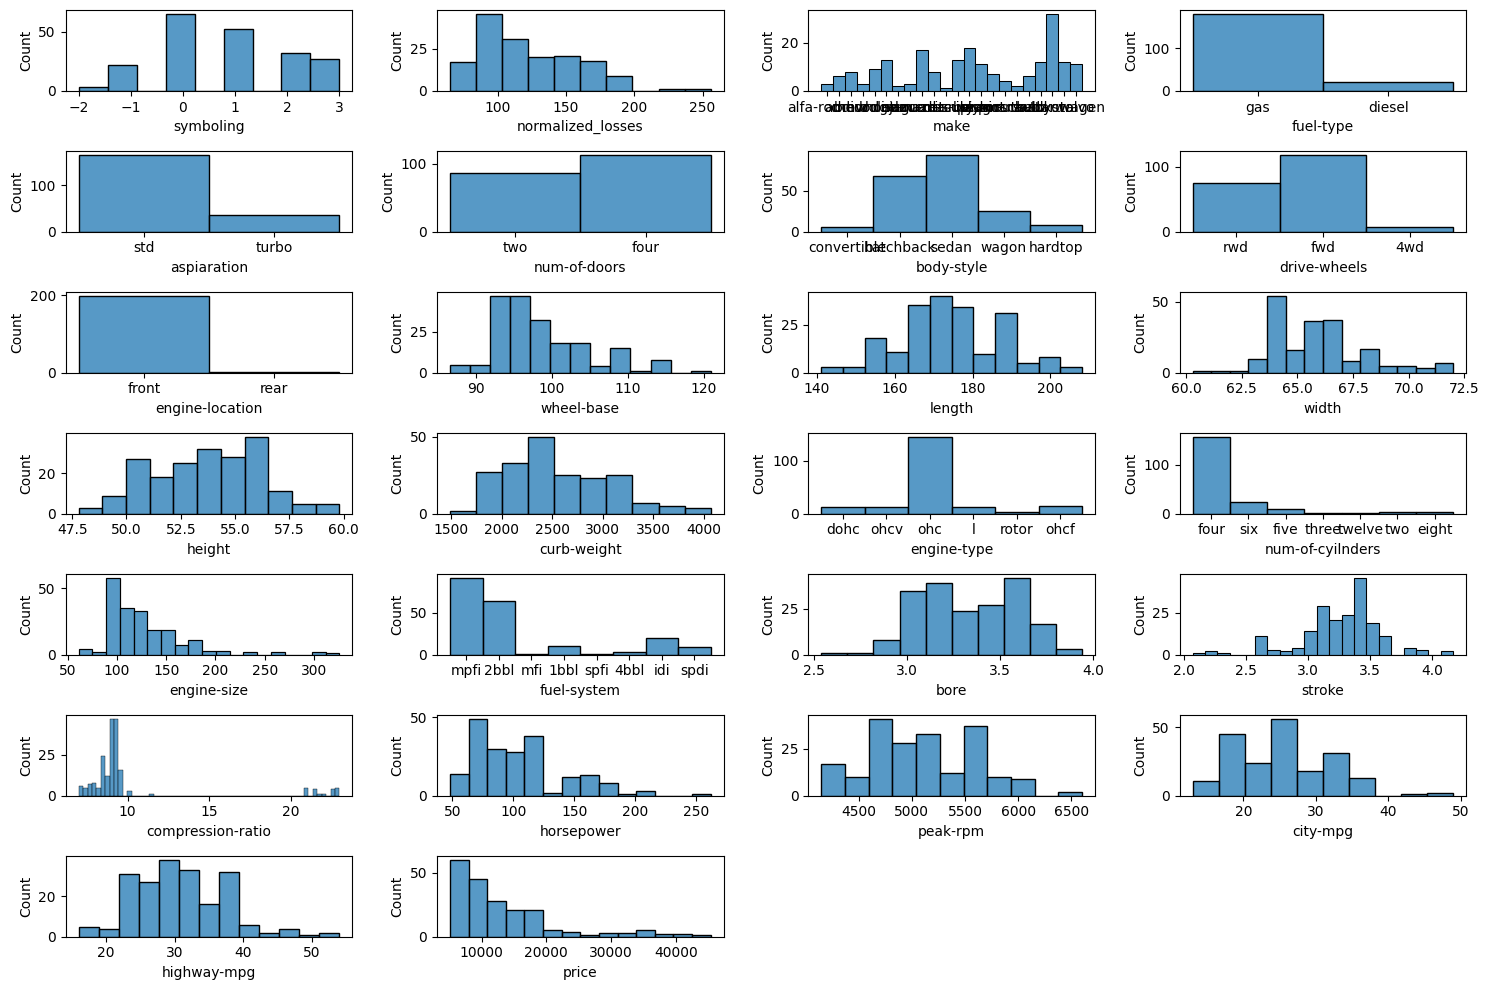

In [15]:
plt.figure(figsize=(15,10),facecolor="white")
plotnumber=1

for column in data:
  if plotnumber<27:
    ax=plt.subplot(7,4,plotnumber)
    sns.histplot(x=data[column])
    plt.xlabel(column,fontsize=10)

  plotnumber+=1
plt.tight_layout()

## **Insights**

*  Car insurance risk level lies between -2 to +2 are the majority values.

*  82% of cars are Average payment loss per year.

*   More than 15% of cars prices belongs to the Toyota,Mazda,nissan and mitsubishi,honda,volkswagon,volvo,peugot,subaru are nearer to 5% and audi,benz,bmw,jaguar are less than 4%

*   Mostly Four doors are likely to use Two doors are slightly less in price.

*   Highly concentrate with Gas fuel comparing to diesel.

*  Standard Aspiration is More price level than the turbo aspiration.

*  Almost every car works better with front wheel drives(fwd) rather than the rear wheel drives(rwd)

*  All people are likely to use engine location is in front side. Thus the price value will be high comparing to rear side engine.

*   Wheel base distance from front wheel to rear wheel ranges from 95 to 102

*   Length of the cars average between 160 to 180 At the same time price will be high in these values. similarly High prices of cars are mostly in heights range from 50 to 55

*   Ohc type of engine is more values among the others like rotor,ohcf,dohc etc..

*   Price will be high which Contains four cylinders.

*  Engine Size should be vary from 100 to 150 in range.

*   Mpfi fuel system is affordable in price.

*   Peak_rpm is generally high in between 4800 to 5200 hence the price value is more for this range.

*   Compression Ratio is defined above 60%

*   Bore,stroke,horsepower ratios are in oscillatory in prices.

# **Bivariate Analysis**

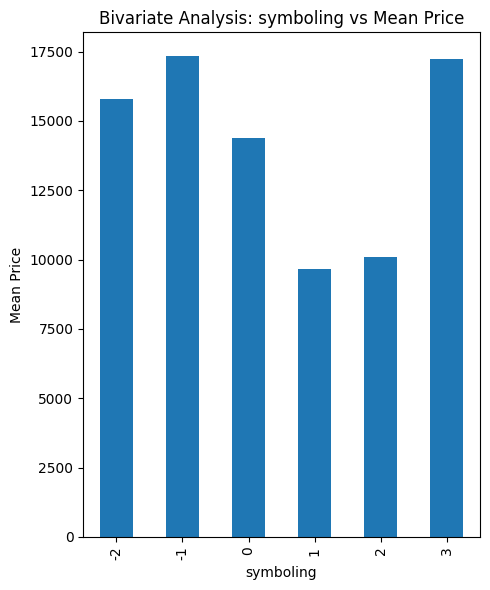

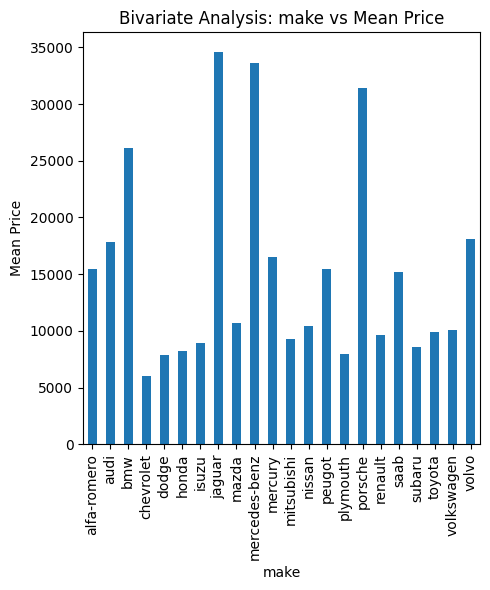

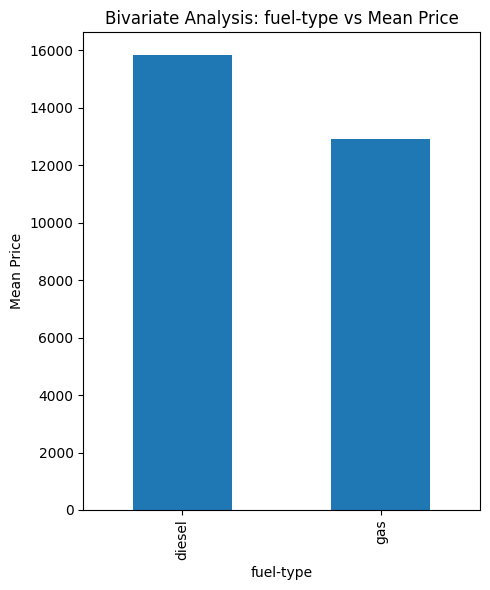

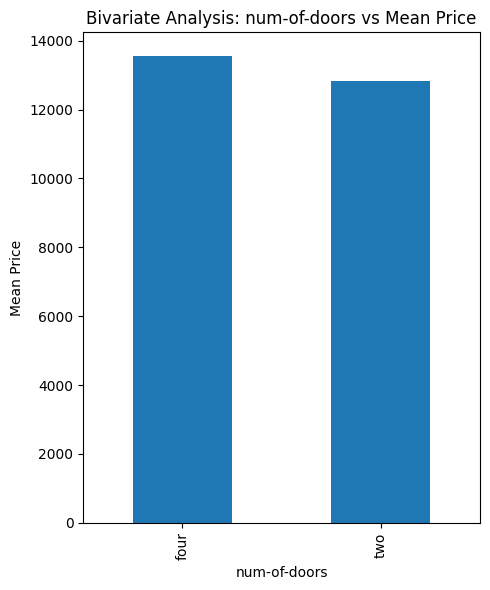

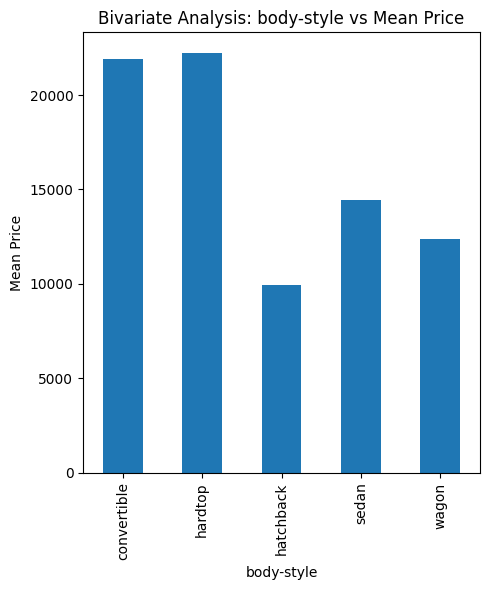

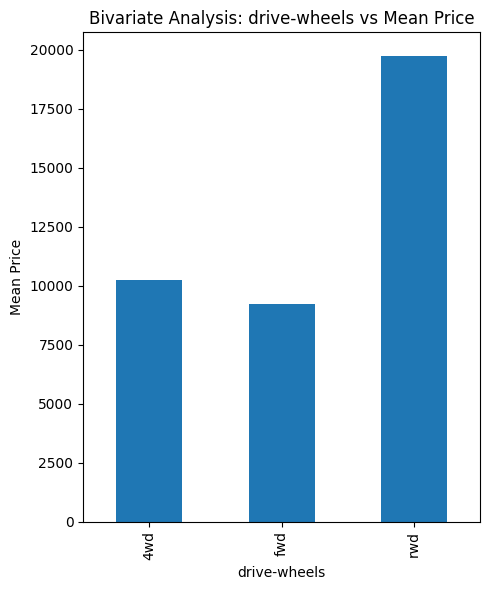

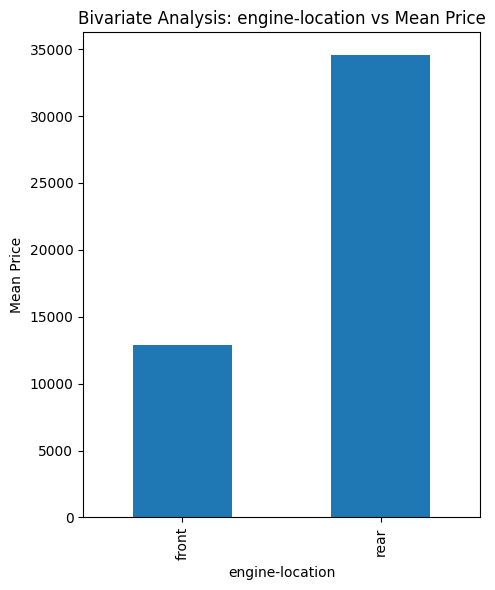

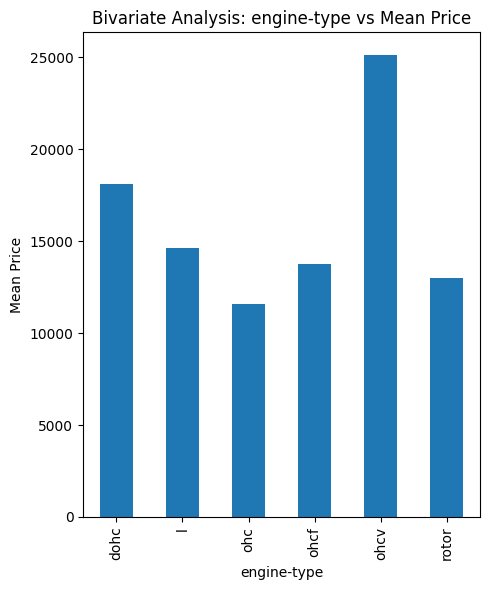

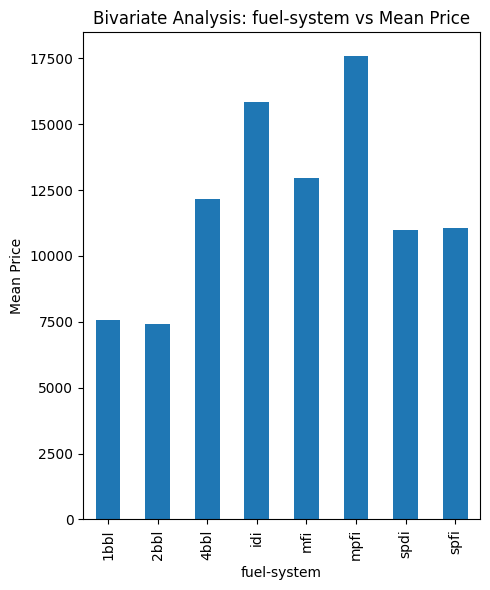

In [16]:
 # List of categorical columns to analyze against the 'price' column
categorical_columns = ["symboling", "make", "fuel-type", "num-of-doors", "body-style", "drive-wheels", "engine-location", "engine-type", "fuel-system"]

# Loop through each column for analysis
for column in categorical_columns:
    # Create a bar plot
    plt.figure(figsize=(5, 6))
    data_grouped = data.groupby(column)["price"].mean()  # Calculate mean price for each category
    data_grouped.plot(kind="bar")
    plt.title(f'Bivariate Analysis: {column} vs Mean Price')
    plt.xlabel(column)
    plt.ylabel('Mean Price')
    plt.tight_layout()
    plt.show()


## **Insights**
* Symboling vs Price:
There isn't a clear trend between the car's risk rating (symboling) and its price. Prices seem to be scattered across different symboling values.

* make vs price:
Car manufacturers seem to have a significant impact on prices. Some brands tend to produce cars with higher prices, while others offer more affordable options.

* Fuel Type vs Price:
Cars with different fuel types (gas or diesel) show a varied price distribution. Diesel cars might have slightly lower prices than gas cars.

* Number of Doors vs Price:
The number of doors doesn't seem to have a strong connection with the car's price. Both two-door and four-door cars are spread across a range of prices.

* Body Style vs Price:
Different body styles (sedan, hatchback, etc.) have different price ranges. For instance, some body styles tend to be priced higher, possibly due to their features or design. Hardtop have a higher price than other style cars.

* Drive Wheels vs Price:
Cars with different drive wheel configurations (e.g., front-wheel drive, rear-wheel driveand four wheel drive) exhibit price variations. Rear wheel drive  configurations have very large number of cars and front wheel drive cars have more price range from low buget car to higher budget cars

* Engine Location vs Price:
Cars with engines placed in different locations (front or rear) have a diverse price distribution. Front engine have relatively more than rear engine.

* Other Numeric Features (e.g., Wheel Base, Length, Width, etc.) vs Price:
Generally, as these features increase, the car prices tend to rise. This suggests that larger cars with more substantial dimensions can often be more expensive.

* Curb Weight vs Price:
Heavier cars tend to have higher prices. This could be due to the use of more advanced materials or larger engines in heavier vehicles.
Engine Type and Size vs Price:

* Engine typre Vs price: Cars with different engine types and sizes show variations in prices. Cars with larger engines might command higher prices.

* Fuel System, Bore, Stroke, Compression Ratio vs Price:
The relationship here might not be as straightforward, as there are several factors at play. Different fuel systems and engine specifications contribute to diverse pricing.

* Horsepower, Peak RPM vs Price:
Generally, cars with higher horsepower and peak RPMs tend to have higher prices, as more powerful engines often come at a premium.
Fuel Efficiency (City MPG, Highway MPG) vs Price:

* Cars with better fuel efficiency (higher MPG) might be priced slightly higher due to the cost-saving advantage they offer over time.

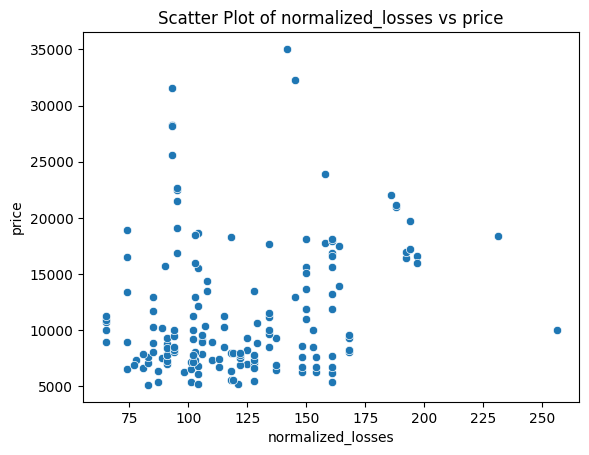

In [17]:
sns.scatterplot(data=data, x='normalized_losses', y='price')
plt.xlabel('normalized_losses')
plt.ylabel('price')
plt.title('Scatter Plot of normalized_losses vs price')
plt.show()

# **Insights**:
* In the scatter plot, the points seem to be scattered without a clear upward or downward trend. This suggests that there isn't a strong linear relationship between normalized losses and the price of the vehicles.
* cross different normalized loss values, there is a wide range of prices. This suggests that normalized losses alone might not be a significant predictor of price.

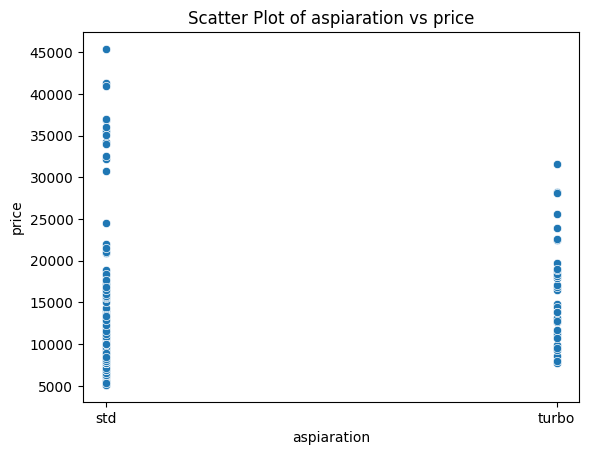

In [18]:
sns.scatterplot(data=data, x='aspiaration', y='price')
plt.xlabel('aspiaration')
plt.ylabel('price')
plt.title('Scatter Plot of aspiaration vs price')
plt.show()

# Insights
* The scatter plot reveals that there are two distinct groups of points along the y-axis (price). These groups likely correspond to the two aspiration types: standard and turbocharged. Vehicles with turbocharged aspiration tend to have lower prices compared to vehicles with standard aspiration.
* You can observe that for both aspiration types, the prices of vehicles vary. However, the prices of turbocharged vehicles generally tend to be lower, and standard exhibit a wider price range compared to standard aspirated vehicles.

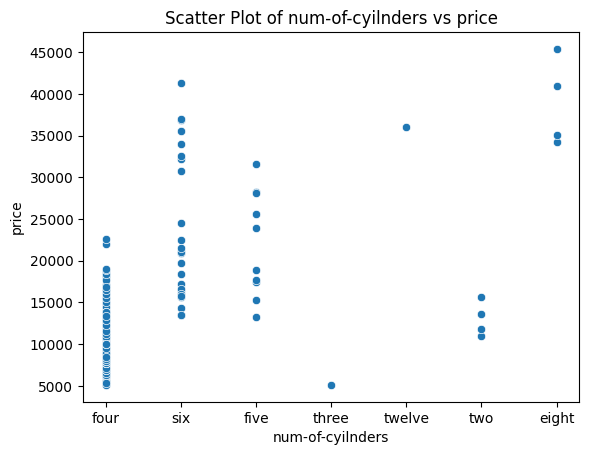

In [19]:
sns.scatterplot(data=data, x='num-of-cyilnders', y='price')
plt.xlabel('num-of-cyilnders')
plt.ylabel('price')
plt.title('Scatter Plot of num-of-cyilnders vs price')
plt.show()

# Insights
* The scatter plot reveals a relationship between the number of cylinders ("num-of-cylinders") and the price of automobiles. The plot indicates that different cylinder counts have distinct price ranges.
* Vehicles with higher cylinder counts tend to exhibit higher prices. This suggests that automobiles with more cylinders are generally considered higher-performance models and are priced accordingly.

# **Multivarite Analysis**

<Figure size 4000x4500 with 0 Axes>

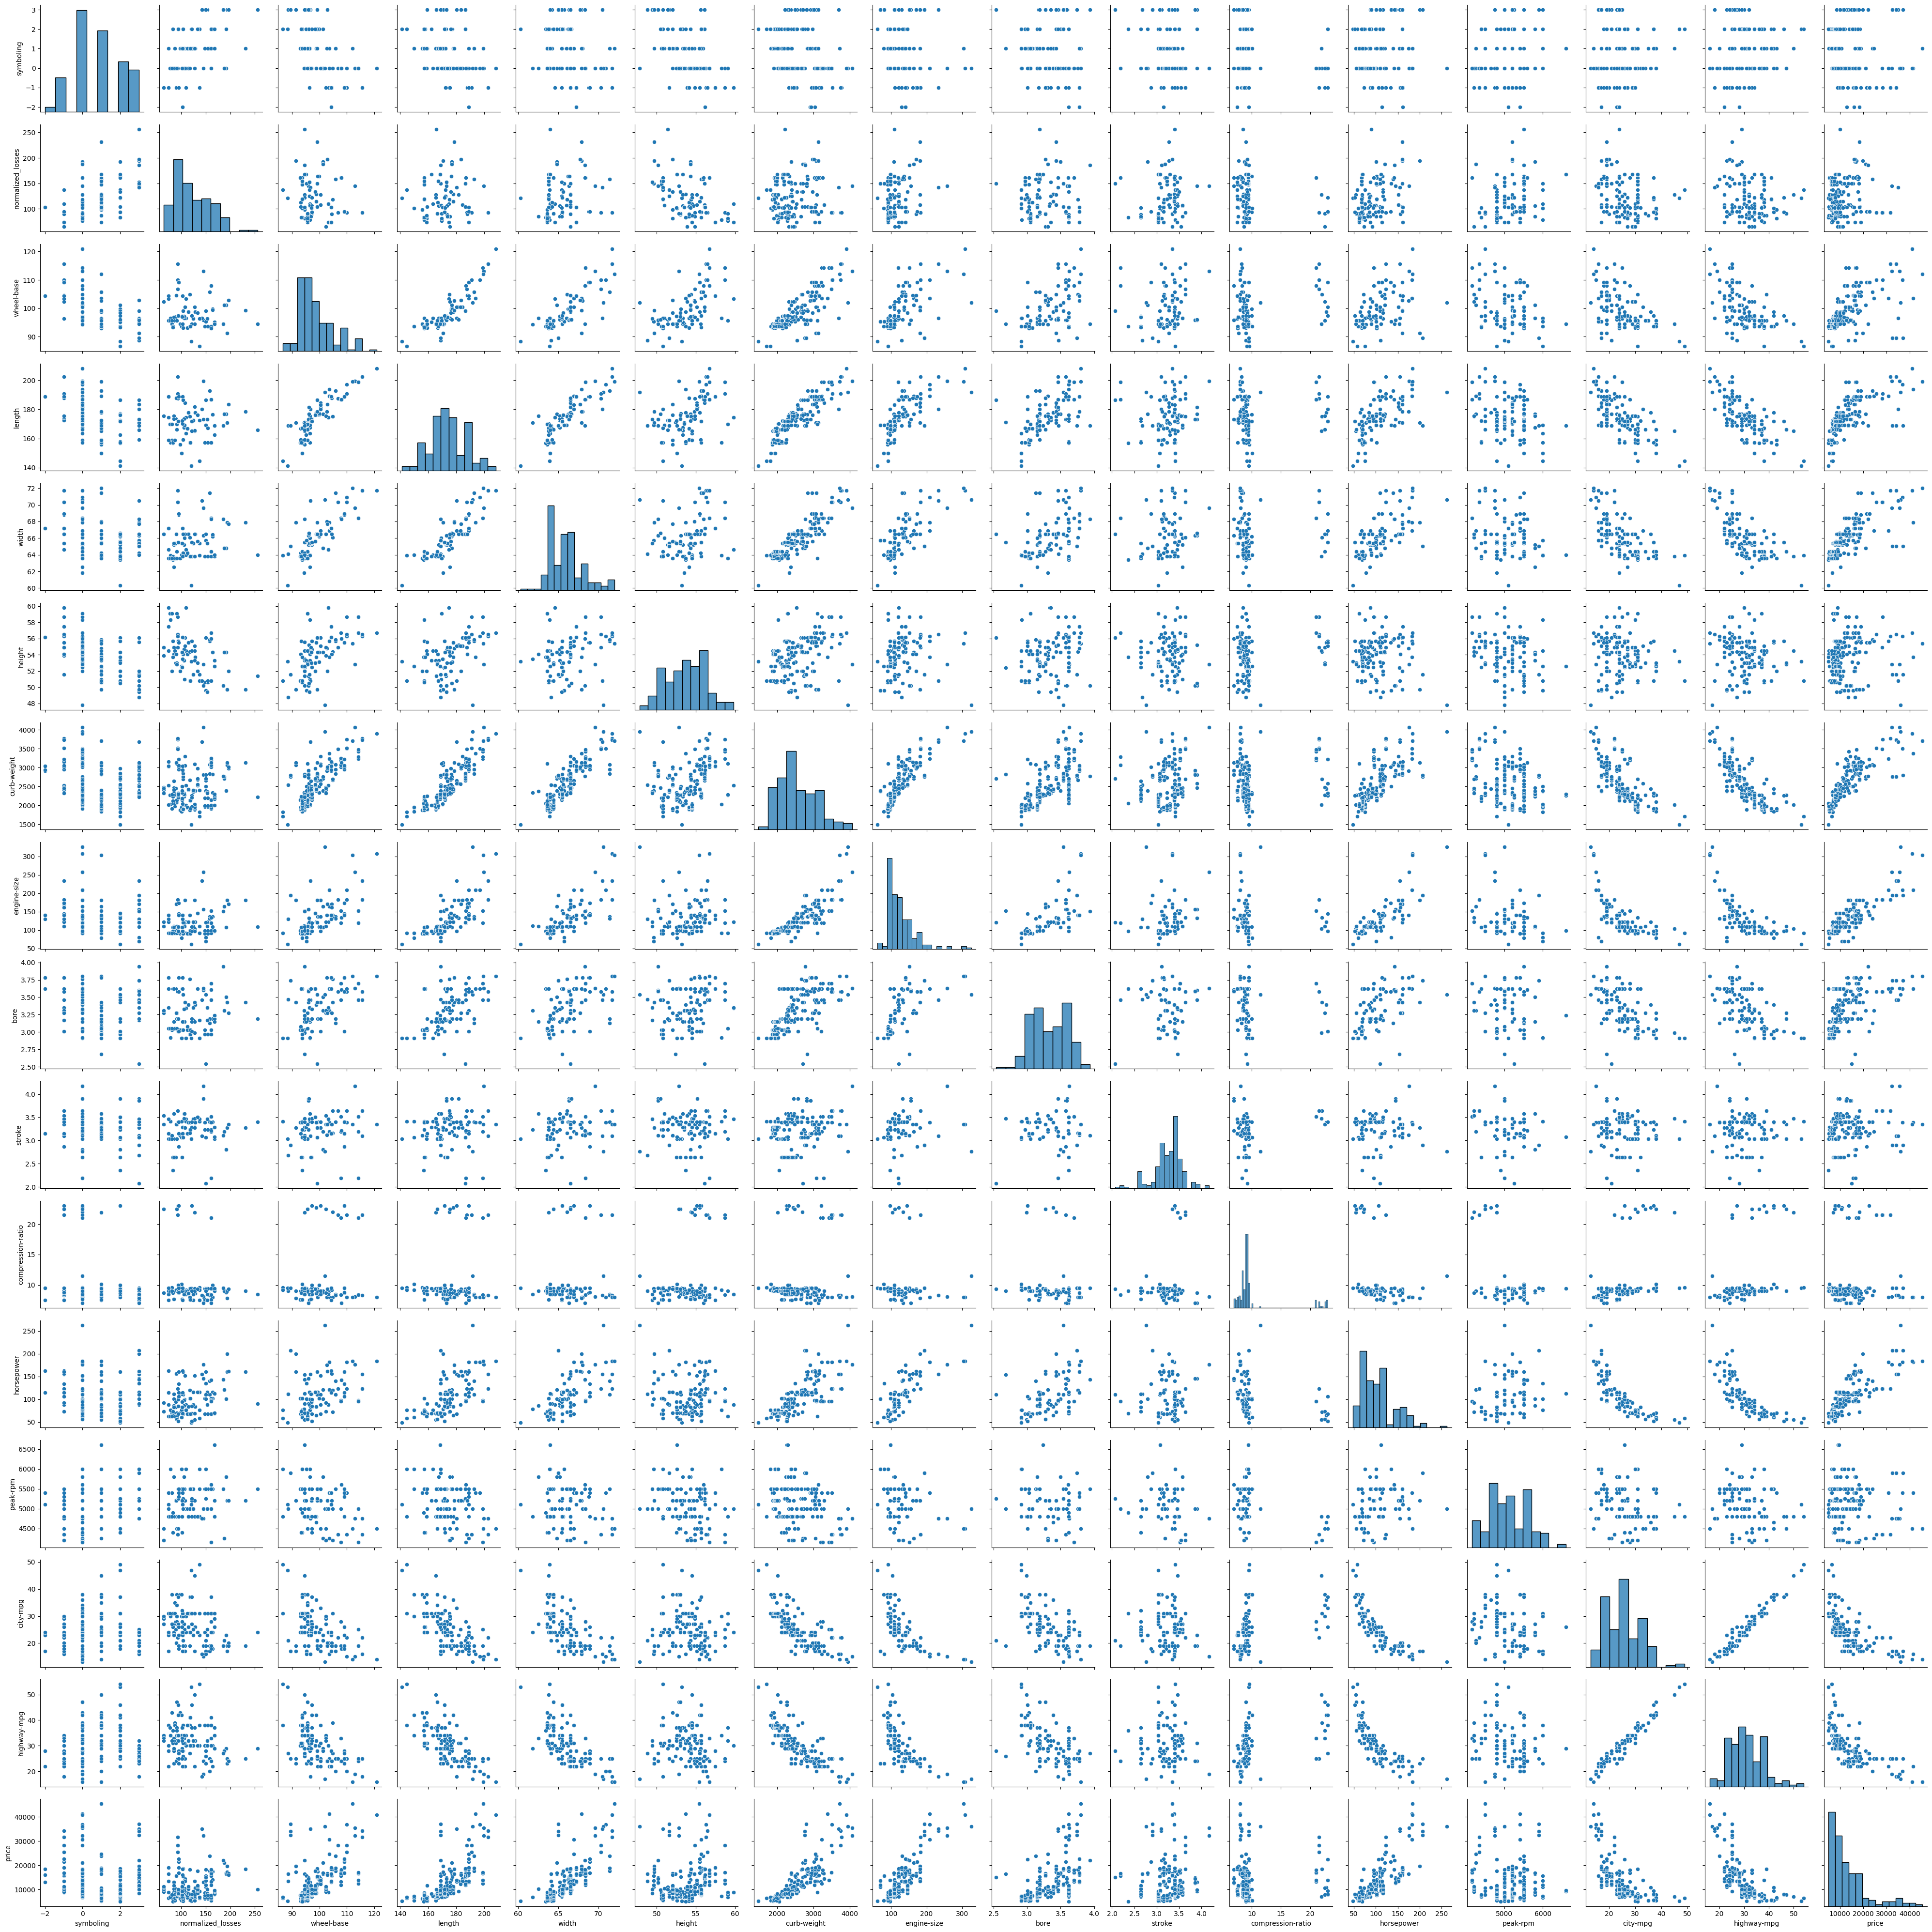

In [20]:
plt.figure(figsize=(40,45))
sns.pairplot(data)
plt.tight_layout()

# **Data Preprocessing**

### Change Rename Columns

In [162]:
data.rename(columns={"normalized_losses": "Normalized_loss", "make": "Make", "fuel-type": "Fuel_type", "aspiaration": "Aspiration", "num-of-doors": "Doors", "body-style": "Body_style", "drive-wheels": "Drive_wheels", "engine-location": "Engine_location", "wheel-base": "Wheel_base", "length": "Length", "width": "Width", "height": "Height", "curb-weight": "Curb_weight", "engine-type": "Engine_type", "num-of-cyilnders": "Cylinders", "engine-size": "Engine_size", "fuel-system": "Fuel_system", "bore": "Bore", "stroke": "Stroke", "compression-ratio": "Compression_ratio", "horsepower": "Horsepower", "peak-rpm": "Peak_rpm", "city-mpg": "City_mpg", "highway-mpg": "Highway_mpg"}, inplace=True)


In [163]:
data.columns

Index(['symboling', 'Normalized_loss', 'Make', 'Fuel_type', 'Aspiration',
       'Doors', 'Body_style', 'Drive_wheels', 'Engine_location', 'Wheel_base',
       'Length', 'Width', 'Height', 'Curb_weight', 'Engine_type', 'Cylinders',
       'Engine_size', 'Fuel_system', 'Bore', 'Stroke', 'Compression_ratio',
       'Horsepower', 'Peak_rpm', 'City_mpg', 'Highway_mpg', 'price'],
      dtype='object')

In [164]:
data.isnull().sum()

symboling            0
Normalized_loss      0
Make                 0
Fuel_type            0
Aspiration           0
Doors                0
Body_style           0
Drive_wheels         0
Engine_location      0
Wheel_base           0
Length               0
Width                0
Height               0
Curb_weight          0
Engine_type          0
Cylinders            0
Engine_size          0
Fuel_system          0
Bore                 0
Stroke               0
Compression_ratio    0
Horsepower           0
Peak_rpm             0
City_mpg             0
Highway_mpg          0
price                0
dtype: int64

In [165]:
data.duplicated().sum()

0

In [166]:
data.dtypes

symboling              int64
Normalized_loss      float64
Make                   int64
Fuel_type              int64
Aspiration            object
Doors                 object
Body_style            object
Drive_wheels          object
Engine_location       object
Wheel_base           float64
Length               float64
Width                float64
Height               float64
Curb_weight            int64
Engine_type           object
Cylinders             object
Engine_size            int64
Fuel_system           object
Bore                 float64
Stroke               float64
Compression_ratio    float64
Horsepower           float64
Peak_rpm             float64
City_mpg               int64
Highway_mpg            int64
price                  int64
dtype: object

## Replacing null values

### Replacing null values for normalized_loss

<Axes: xlabel='Normalized_loss', ylabel='Count'>

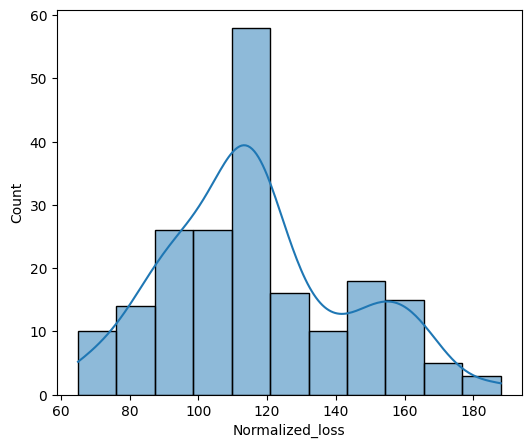

In [167]:
plt.figure(figsize=(6,5))
sns.histplot(data=data,x="Normalized_loss",kde=True)

* Here we have left-skewed data (Left-skewed data means that the majority of the data points are clustered on the right side of the distribution, leaving a long tail towards the left)
* Mean/Median Imputation: For left-skewed data, median imputation might be more appropriate than mean imputation. The median is less affected by outliers in the tail of the distribution.
* So go with median

In [168]:
data["Normalized_loss"].median()

115.0

In [169]:
data.loc[data["Normalized_loss"].isnull()==True,"Normalized_loss"]=115.0

In [170]:
data.isnull().sum()

symboling            0
Normalized_loss      0
Make                 0
Fuel_type            0
Aspiration           0
Doors                0
Body_style           0
Drive_wheels         0
Engine_location      0
Wheel_base           0
Length               0
Width                0
Height               0
Curb_weight          0
Engine_type          0
Cylinders            0
Engine_size          0
Fuel_system          0
Bore                 0
Stroke               0
Compression_ratio    0
Horsepower           0
Peak_rpm             0
City_mpg             0
Highway_mpg          0
price                0
dtype: int64

### Replacing null values for doors

<Axes: xlabel='Doors', ylabel='Count'>

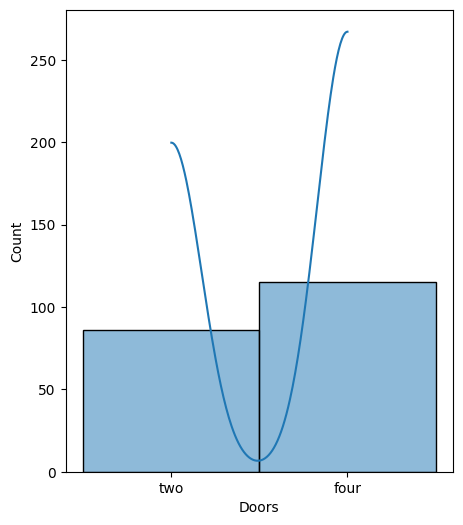

In [171]:
plt.figure(figsize=(5,6))
sns.histplot(data=data,x=data.Doors,kde=True)

In [172]:
data["Doors"].mode()

0    four
Name: Doors, dtype: object

In [173]:
data.Doors.unique()
data.Doors.value_counts()

four    115
two      86
Name: Doors, dtype: int64

In [174]:
data.loc[data["Doors"].isnull()==True,"Doors"]="four"

In [175]:
data.isnull().sum()

symboling            0
Normalized_loss      0
Make                 0
Fuel_type            0
Aspiration           0
Doors                0
Body_style           0
Drive_wheels         0
Engine_location      0
Wheel_base           0
Length               0
Width                0
Height               0
Curb_weight          0
Engine_type          0
Cylinders            0
Engine_size          0
Fuel_system          0
Bore                 0
Stroke               0
Compression_ratio    0
Horsepower           0
Peak_rpm             0
City_mpg             0
Highway_mpg          0
price                0
dtype: int64

### Replacing null values for bore

<Axes: xlabel='Bore', ylabel='Count'>

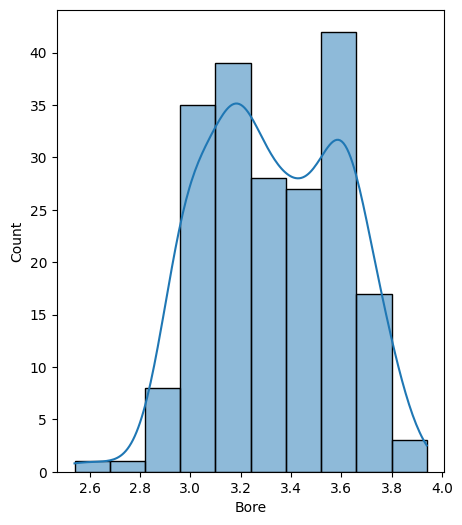

In [176]:
plt.figure(figsize=(5,6))
sns.histplot(data=data,x=data.Bore,kde="True")

In [177]:
data["Bore"].median()

3.31

In [178]:
data.loc[data["Bore"].isnull()==True,"Bore"]=3.31

### Replacing null values for stroke

<Axes: xlabel='Stroke', ylabel='Count'>

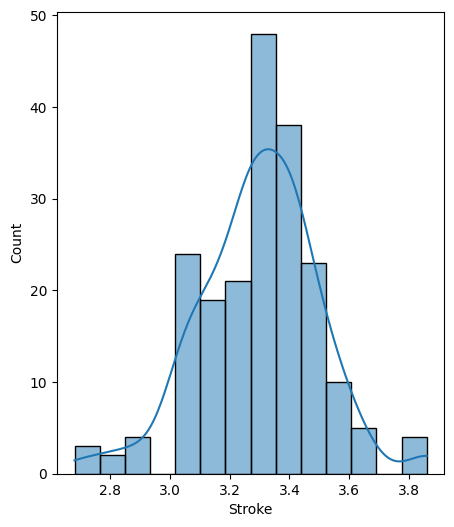

In [179]:
plt.figure(figsize=(5,6))
sns.histplot(data=data,x=data.Stroke,kde=True)

In [180]:
data["Stroke"].median()

3.29

In [181]:
data.loc[data["Stroke"].isnull()==True,"Stroke"]=3.29

In [182]:
data.isnull().sum()

symboling            0
Normalized_loss      0
Make                 0
Fuel_type            0
Aspiration           0
Doors                0
Body_style           0
Drive_wheels         0
Engine_location      0
Wheel_base           0
Length               0
Width                0
Height               0
Curb_weight          0
Engine_type          0
Cylinders            0
Engine_size          0
Fuel_system          0
Bore                 0
Stroke               0
Compression_ratio    0
Horsepower           0
Peak_rpm             0
City_mpg             0
Highway_mpg          0
price                0
dtype: int64

### Replacing null values for horsepower

<Axes: xlabel='Horsepower', ylabel='Count'>

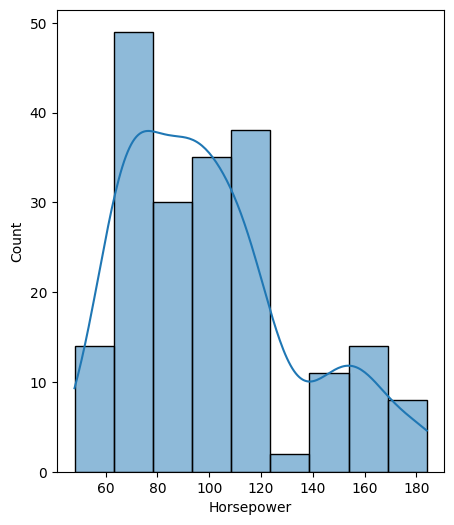

In [183]:
plt.figure(figsize=(5,6))
sns.histplot(data=data,x=data.Horsepower,kde="True")

In [184]:
data["Horsepower"].median()

95.0

In [185]:
data.loc[data["Horsepower"].isnull()==True,"Horsepower"]=95.0

In [186]:
data.isnull().sum()

symboling            0
Normalized_loss      0
Make                 0
Fuel_type            0
Aspiration           0
Doors                0
Body_style           0
Drive_wheels         0
Engine_location      0
Wheel_base           0
Length               0
Width                0
Height               0
Curb_weight          0
Engine_type          0
Cylinders            0
Engine_size          0
Fuel_system          0
Bore                 0
Stroke               0
Compression_ratio    0
Horsepower           0
Peak_rpm             0
City_mpg             0
Highway_mpg          0
price                0
dtype: int64

### Replacing null values for peak_rpm

<Axes: xlabel='Peak_rpm', ylabel='Count'>

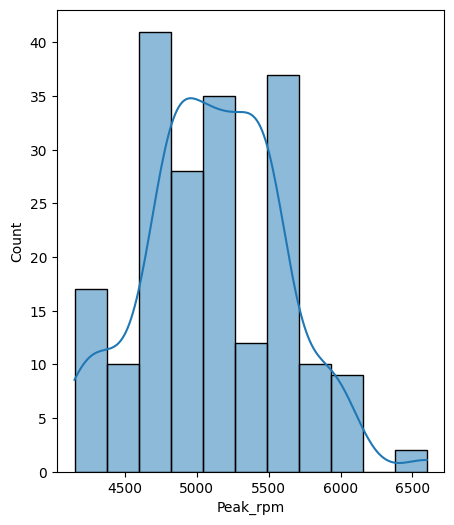

In [187]:
plt.figure(figsize=(5,6))
sns.histplot(data=data,x=data.Peak_rpm,kde="True")

In [188]:
data["Peak_rpm"].median()

5200.0

In [189]:
data.loc[data["Peak_rpm"].isnull()==True,"Peak_rpm"]=5200.0

In [190]:
data.isnull().sum()

symboling            0
Normalized_loss      0
Make                 0
Fuel_type            0
Aspiration           0
Doors                0
Body_style           0
Drive_wheels         0
Engine_location      0
Wheel_base           0
Length               0
Width                0
Height               0
Curb_weight          0
Engine_type          0
Cylinders            0
Engine_size          0
Fuel_system          0
Bore                 0
Stroke               0
Compression_ratio    0
Horsepower           0
Peak_rpm             0
City_mpg             0
Highway_mpg          0
price                0
dtype: int64

# Check for Outliers

In [191]:
num_data=data.select_dtypes(include=["int64","float64"]).columns

In [192]:
num_data

Index(['symboling', 'Normalized_loss', 'Make', 'Fuel_type', 'Wheel_base',
       'Length', 'Width', 'Height', 'Curb_weight', 'Engine_size', 'Bore',
       'Stroke', 'Compression_ratio', 'Horsepower', 'Peak_rpm', 'City_mpg',
       'Highway_mpg', 'price'],
      dtype='object')

In [193]:
cat_data

Index(['make', 'fuel-type', 'aspiaration', 'num-of-doors', 'body-style',
       'drive-wheels', 'engine-location', 'engine-type', 'num-of-cyilnders',
       'fuel-system'],
      dtype='object')

In [194]:
data1=num_data.copy()
data1

Index(['symboling', 'Normalized_loss', 'Make', 'Fuel_type', 'Wheel_base',
       'Length', 'Width', 'Height', 'Curb_weight', 'Engine_size', 'Bore',
       'Stroke', 'Compression_ratio', 'Horsepower', 'Peak_rpm', 'City_mpg',
       'Highway_mpg', 'price'],
      dtype='object')

In [195]:
data2=cat_data.copy()
data2

Index(['make', 'fuel-type', 'aspiaration', 'num-of-doors', 'body-style',
       'drive-wheels', 'engine-location', 'engine-type', 'num-of-cyilnders',
       'fuel-system'],
      dtype='object')

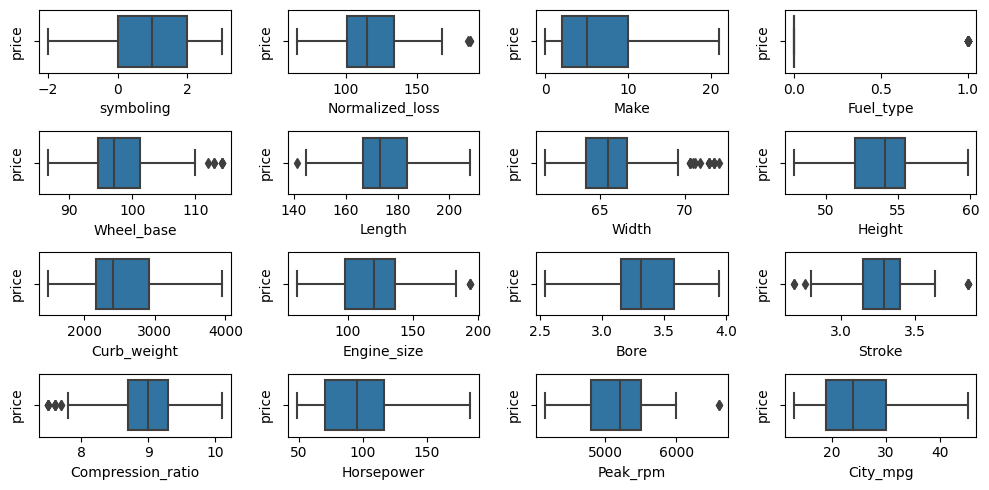

In [196]:
plt.figure(figsize=(10,5),facecolor="white")
plotnumber=1

for column in data1:
  if plotnumber<17:
    ax=plt.subplot(4,4,plotnumber)
    sns.boxplot(x=data[column])
    plt.xlabel(column,fontsize=10)
    plt.ylabel("price",fontsize=10)
  plotnumber+=1
plt.tight_layout()

### OUTLIERS FOR NORMALIZED_LOSS

<Axes: xlabel='Normalized_loss', ylabel='Count'>

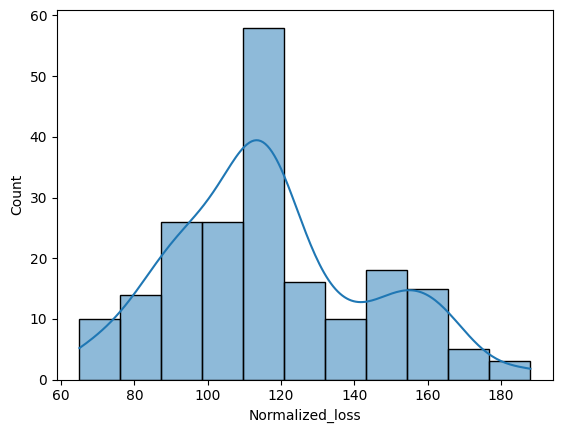

In [197]:
sns.histplot(data=data,x='Normalized_loss',kde=True)

In [198]:
Q1=data["Normalized_loss"].quantile(0.25)
print("lower_quartile",Q1)
Q3=data["Normalized_loss"].quantile(0.75)
print("upper_quartile",Q3)

lower_quartile 101.0
upper_quartile 134.0


In [199]:
IQR=Q3-Q1
IQR

33.0

In [200]:
lower_limit=Q1-1.5*IQR
print("lower_limit is",lower_limit)
upper_limit=Q3+1.5*IQR
print("upper_limit is",upper_limit)

lower_limit is 51.5
upper_limit is 183.5


In [201]:
len(data.loc[data["Normalized_loss"]>upper_limit])/len(data)

0.014925373134328358

In [202]:
data.loc[data["Normalized_loss"]>upper_limit]

,symboling,Normalized_loss,Make,Fuel_type,Aspiration,Doors,Body_style,Drive_wheels,Engine_location,Wheel_base,...,Engine_size,Fuel_system,Bore,Stroke,Compression_ratio,Horsepower,Peak_rpm,City_mpg,Highway_mpg,price
11,0,188.0,11,0,std,two,sedan,rwd,front,101.2,...,164,mpfi,3.31,3.19,9.0,121.0,4250.0,21,28,20970
12,0,188.0,11,0,std,four,sedan,rwd,front,101.2,...,164,mpfi,3.31,3.19,9.0,121.0,4250.0,21,28,21105
122,3,186.0,15,0,std,two,hatchback,rwd,front,94.5,...,151,mpfi,3.94,3.11,9.5,143.0,5500.0,19,27,22018


In [203]:
data.loc[data["Normalized_loss"]>upper_limit,"Normalized_loss"]=data["Normalized_loss"].median()

<Axes: xlabel='Normalized_loss'>

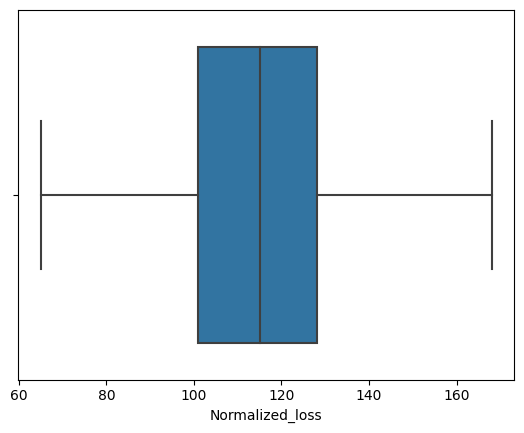

In [204]:
sns.boxplot(x=data.Normalized_loss)

<Axes: xlabel='Normalized_loss', ylabel='Count'>

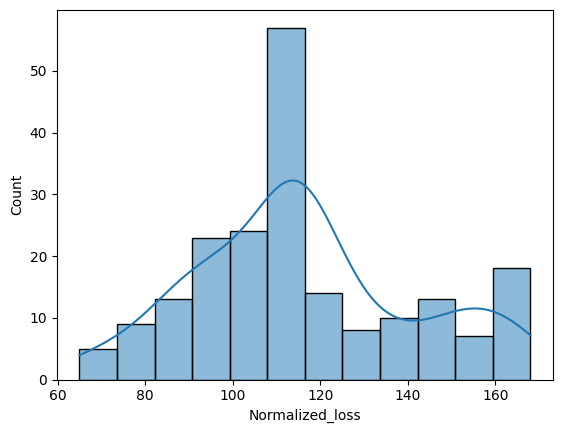

In [205]:
sns.histplot(data=data,x='Normalized_loss',kde=True)

### OUTLIERS FOR WHEEL_BASE

<Axes: xlabel='Normalized_loss', ylabel='Count'>

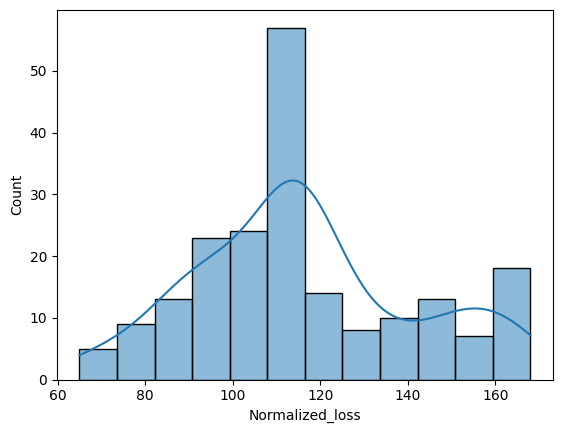

In [206]:
sns.histplot(data=data,x='Normalized_loss',kde=True)

In [207]:
Q1=data["Wheel_base"].quantile(0.25)
print("lower_quartile",Q1)
Q3=data["Wheel_base"].quantile(0.75)
print("upper_quartile",Q3)

lower_quartile 94.5
upper_quartile 101.2


In [208]:
IQR=Q3-Q1
IQR

6.700000000000003

In [209]:
lower_limit=Q1-1.5*IQR
print("lower_limit is",lower_limit)
upper_limit=Q3+1.5*IQR
print("upper_limit is",upper_limit)

lower_limit is 84.44999999999999
upper_limit is 111.25


In [210]:
data.loc[data["Wheel_base"]>upper_limit]

,symboling,Normalized_loss,Make,Fuel_type,Aspiration,Doors,Body_style,Drive_wheels,Engine_location,Wheel_base,...,Engine_size,Fuel_system,Bore,Stroke,Compression_ratio,Horsepower,Peak_rpm,City_mpg,Highway_mpg,price
44,0,145.0,16,0,std,four,sedan,rwd,front,113.0,...,120,mpfi,3.63,3.29,8.1,176.0,4750.0,15,19,32250
45,0,115.0,16,0,std,four,sedan,rwd,front,113.0,...,120,mpfi,3.63,3.29,8.1,176.0,4750.0,15,19,35550
71,1,115.0,10,0,std,two,hardtop,rwd,front,112.0,...,120,mpfi,3.80,3.35,8.0,184.0,4500.0,14,16,45400
106,0,115.0,7,0,std,four,wagon,rwd,front,114.2,...,120,mpfi,3.46,3.19,8.4,97.0,5000.0,19,24,12440
107,0,115.0,7,1,turbo,four,wagon,rwd,front,114.2,...,152,idi,3.70,3.52,9.0,95.0,4150.0,25,25,13860
110,0,115.0,7,0,std,four,wagon,rwd,front,114.2,...,120,mpfi,3.46,3.29,8.4,95.0,5000.0,19,24,16695
111,0,115.0,7,1,turbo,four,wagon,rwd,front,114.2,...,152,idi,3.70,3.52,9.0,95.0,4150.0,25,25,17075


In [211]:
len(data.loc[data["Wheel_base"]>upper_limit])/len(data)

0.03482587064676617

In [212]:
data.loc[data["Wheel_base"]>upper_limit,"Wheel_base"]=data["Wheel_base"].median()

<Axes: xlabel='Wheel_base'>

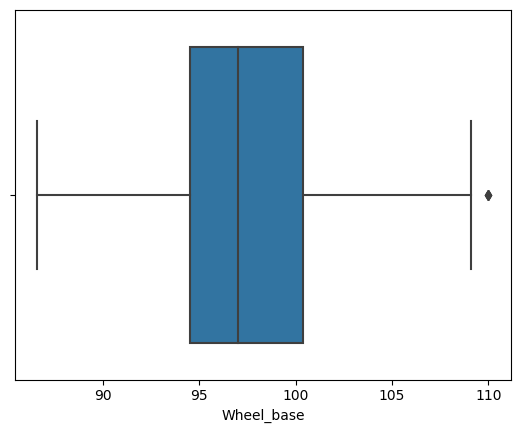

In [213]:
sns.boxplot(x=data.Wheel_base)

### OUTLIERS FOR LENGTH

<Axes: xlabel='Length', ylabel='Count'>

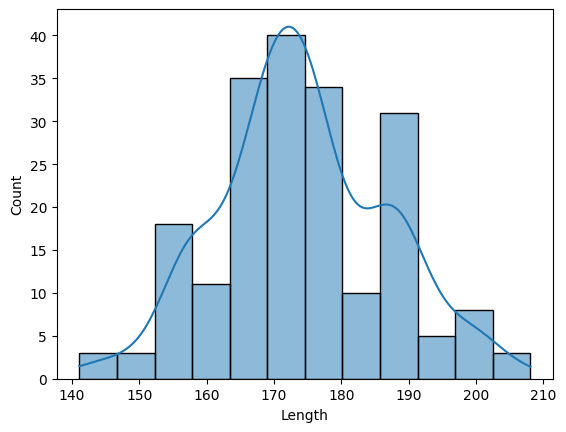

In [214]:
sns.histplot(data=data,x='Length',kde=True)

In [215]:
Q1=data["Length"].quantile(0.25)
print("lower_quartile",Q1)
Q3=data["Length"].quantile(0.75)
print("upper_quartile",Q3)

lower_quartile 166.8
upper_quartile 183.5


In [216]:
IQR=Q3-Q1
IQR

16.69999999999999

In [217]:
lower_limit=Q1-1.5*IQR
print("lower_limit is",lower_limit)
upper_limit=Q3+1.5*IQR
print("upper_limit is",upper_limit)

lower_limit is 141.75000000000003
upper_limit is 208.54999999999998


In [218]:
data.loc[data["Length"]<lower_limit]

,symboling,Normalized_loss,Make,Fuel_type,Aspiration,Doors,Body_style,Drive_wheels,Engine_location,Wheel_base,...,Engine_size,Fuel_system,Bore,Stroke,Compression_ratio,Horsepower,Peak_rpm,City_mpg,Highway_mpg,price
17,2,121.0,17,0,std,two,hatchback,fwd,front,88.4,...,61,2bbl,2.91,3.03,9.5,48.0,5100.0,24,30,5151


In [219]:
len(data.loc[data["Wheel_base"]<lower_limit])/len(data)

1.0

<Axes: xlabel='Length'>

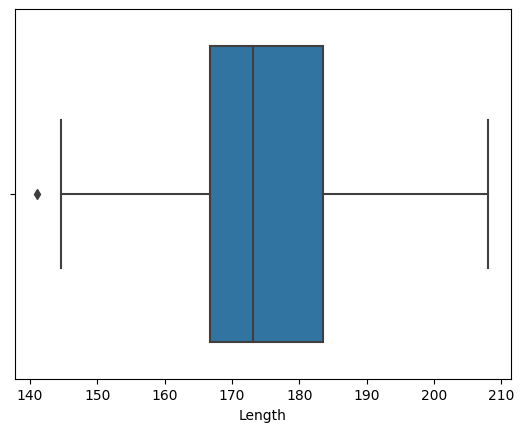

In [220]:
sns.boxplot(x=data.Length)

### OUTLIERS FOR WIDTH

<Axes: xlabel='Width', ylabel='Count'>

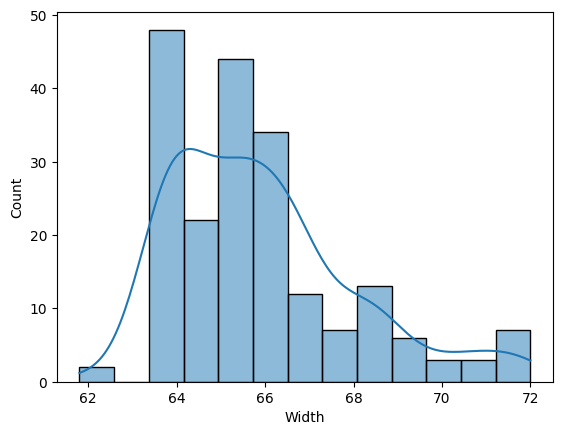

In [221]:
sns.histplot(data=data,x='Width',kde=True)

In [222]:
Q1=data["Width"].quantile(0.25)
print("lower_quartile",Q1)
Q3=data["Width"].quantile(0.75)
print("upper_quartile",Q3)

lower_quartile 64.2
upper_quartile 66.6


In [223]:


IQR=Q3-Q1
IQR

2.3999999999999915

In [224]:
lower_limit=Q1-1.5*IQR
print("lower_limit is",lower_limit)
upper_limit=Q3+1.5*IQR
print("upper_limit is",upper_limit)

lower_limit is 60.600000000000016
upper_limit is 70.19999999999999


In [225]:
data.loc[data["Width"]<lower_limit]

,symboling,Normalized_loss,Make,Fuel_type,Aspiration,Doors,Body_style,Drive_wheels,Engine_location,Wheel_base,...,Engine_size,Fuel_system,Bore,Stroke,Compression_ratio,Horsepower,Peak_rpm,City_mpg,Highway_mpg,price


In [226]:
len(data.loc[data["Width"]<lower_limit])/len(data)

0.0

In [227]:
data.loc[data["Width"]>upper_limit]

,symboling,Normalized_loss,Make,Fuel_type,Aspiration,Doors,Body_style,Drive_wheels,Engine_location,Wheel_base,...,Engine_size,Fuel_system,Bore,Stroke,Compression_ratio,Horsepower,Peak_rpm,City_mpg,Highway_mpg,price
6,1,158.0,13,0,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,17710
7,1,115.0,13,0,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,18920
8,1,158.0,13,0,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140.0,5500.0,17,20,23875
16,0,115.0,11,0,std,four,sedan,rwd,front,110.0,...,120,mpfi,3.62,3.39,8.0,182.0,5400.0,15,20,36880
46,0,115.0,16,0,std,two,sedan,rwd,front,102.0,...,120,mpfi,3.54,2.76,9.0,95.0,5000.0,13,17,36000
64,-1,93.0,10,1,turbo,four,sedan,rwd,front,110.0,...,183,idi,3.58,3.64,9.0,123.0,4350.0,22,25,25552
65,-1,93.0,10,1,turbo,four,wagon,rwd,front,110.0,...,183,idi,3.58,3.64,9.0,123.0,4350.0,22,25,28248
66,0,93.0,10,1,turbo,two,hardtop,rwd,front,106.7,...,183,idi,3.58,3.64,9.0,123.0,4350.0,22,25,28176
67,-1,93.0,10,1,turbo,four,sedan,rwd,front,97.0,...,183,idi,3.58,3.64,9.0,123.0,4350.0,22,25,31600
68,-1,115.0,10,0,std,four,sedan,rwd,front,97.0,...,120,mpfi,3.46,3.10,8.3,155.0,4750.0,16,18,34184


In [228]:
len(data.loc[data["Normalized_loss"]>upper_limit])/len(data)

0.9751243781094527

In [229]:
data.loc[data["Width"]<lower_limit,"Width"]=data["Width"].median()

<Axes: xlabel='Width'>

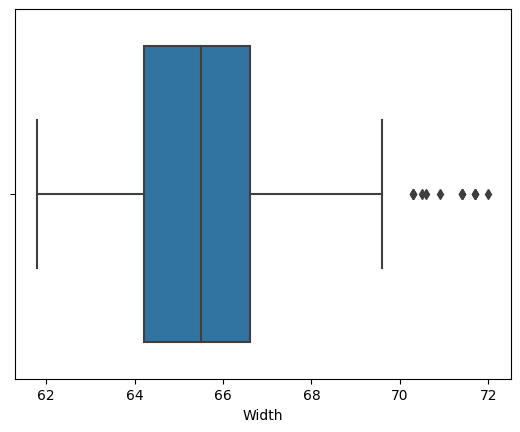

In [230]:
sns.boxplot(x=data.Width)

### OUTLIERS FOR CURB_WEIGHTS

<Axes: xlabel='Curb_weight', ylabel='Count'>

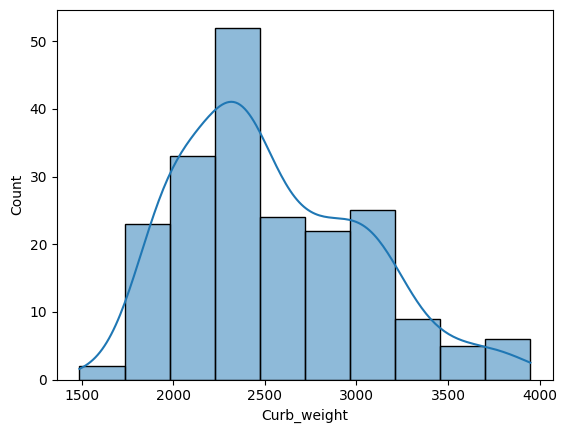

In [231]:
sns.histplot(data=data,x='Curb_weight',kde=True)

In [232]:
Q1=data["Curb_weight"].quantile(0.25)
print("lower_quartile",Q1)
Q3=data["Curb_weight"].quantile(0.75)
print("upper_quartile",Q3)

lower_quartile 2169.0
upper_quartile 2912.0


In [233]:
IQR=Q3-Q1
IQR

743.0

In [234]:
lower_limit=Q1-1.5*IQR
print("lower_limit is",lower_limit)
upper_limit=Q3+1.5*IQR
print("upper_limit is",upper_limit)

lower_limit is 1054.5
upper_limit is 4026.5


In [235]:
data.loc[data["Curb_weight"]<lower_limit]

,symboling,Normalized_loss,Make,Fuel_type,Aspiration,Doors,Body_style,Drive_wheels,Engine_location,Wheel_base,...,Engine_size,Fuel_system,Bore,Stroke,Compression_ratio,Horsepower,Peak_rpm,City_mpg,Highway_mpg,price


In [236]:
data.loc[data["Curb_weight"]>upper_limit]

,symboling,Normalized_loss,Make,Fuel_type,Aspiration,Doors,Body_style,Drive_wheels,Engine_location,Wheel_base,...,Engine_size,Fuel_system,Bore,Stroke,Compression_ratio,Horsepower,Peak_rpm,City_mpg,Highway_mpg,price


In [237]:
len(data.loc[data["Curb_weight"]>upper_limit])/len(data)

0.0

In [238]:
data.loc[data["Curb_weight"]>upper_limit,"Curb_weight"]=data["Curb_weight"].median()

<Axes: xlabel='Curb_weight'>

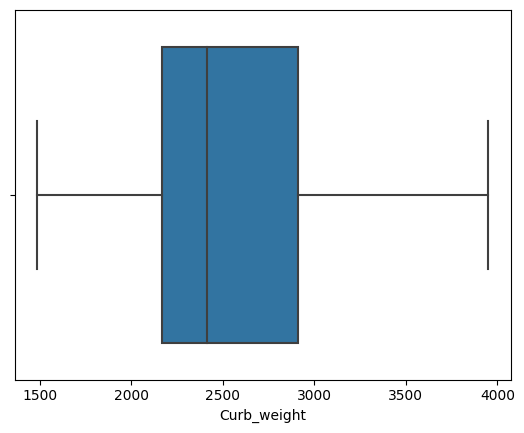

In [239]:
sns.boxplot(x=data.Curb_weight)

### OUTLIERS FOR ENGINE SIZE

<Axes: xlabel='Curb_weight', ylabel='Count'>

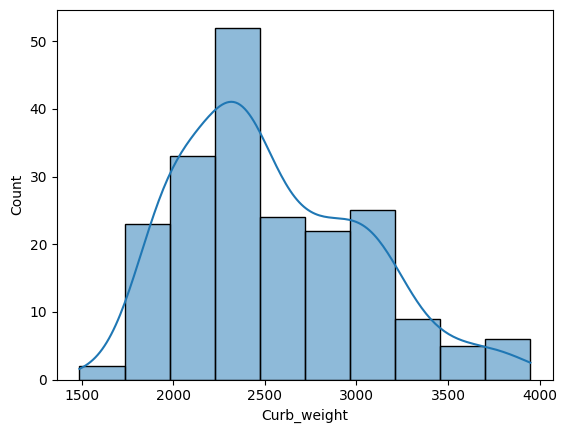

In [240]:
sns.histplot(data=data,x='Curb_weight',kde=True)

In [241]:
Q1=data["Engine_size"].quantile(0.25)
print("lower_quartile",Q1)
Q3=data["Engine_size"].quantile(0.75)
print("upper_quartile",Q3)

lower_quartile 98.0
upper_quartile 136.0


In [242]:
IQR=Q3-Q1
IQR

38.0

In [243]:
lower_limit=Q1-1.5*IQR
print("lower_limit is",lower_limit)
upper_limit=Q3+1.5*IQR
print("upper_limit is",upper_limit)

lower_limit is 41.0
upper_limit is 193.0


In [244]:
data.loc[data["Engine_size"]>upper_limit]

,symboling,Normalized_loss,Make,Fuel_type,Aspiration,Doors,Body_style,Drive_wheels,Engine_location,Wheel_base,...,Engine_size,Fuel_system,Bore,Stroke,Compression_ratio,Horsepower,Peak_rpm,City_mpg,Highway_mpg,price
123,3,115.0,15,0,std,two,hardtop,rwd,rear,89.5,...,194,mpfi,3.74,2.9,9.5,95.0,5900.0,17,25,32528
124,3,115.0,15,0,std,two,hardtop,rwd,rear,89.5,...,194,mpfi,3.74,2.9,9.5,95.0,5900.0,17,25,34028
125,3,115.0,15,0,std,two,convertible,rwd,rear,89.5,...,194,mpfi,3.74,2.9,9.5,95.0,5900.0,17,25,37028


In [245]:
len(data.loc[data["Engine_size"]>upper_limit])/len(data)

0.014925373134328358

In [246]:
data.loc[data["Engine_size"]>upper_limit,"Engine_size"]=data["Engine_size"].median()

<Axes: xlabel='Engine_size'>

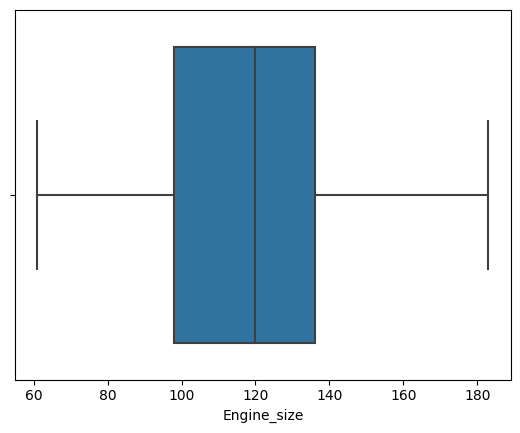

In [247]:
sns.boxplot(x=data.Engine_size)

### OUTLIERS FOR COMPRESSION_RATIO

<Axes: xlabel='Curb_weight', ylabel='Count'>

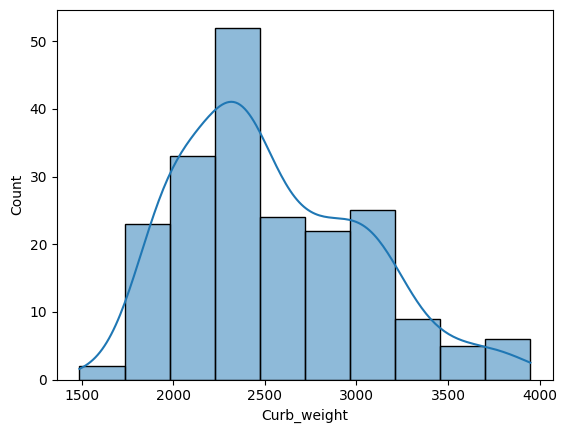

In [248]:
sns.histplot(data=data,x='Curb_weight',kde=True)

In [249]:
Q1=data["Compression_ratio"].quantile(0.25)
print("lower_quartile",Q1)
Q3=data["Compression_ratio"].quantile(0.75)
print("upper_quartile",Q3)

lower_quartile 8.7
upper_quartile 9.3


In [250]:
IQR=Q3-Q1
IQR

0.6000000000000014

In [251]:
lower_limit=Q1-1.5*IQR
print("lower_limit is",lower_limit)
upper_limit=Q3+1.5*IQR
print("upper_limit is",upper_limit)

lower_limit is 7.799999999999997
upper_limit is 10.200000000000003


In [252]:
data.loc[data["Compression_ratio"]>upper_limit]

,symboling,Normalized_loss,Make,Fuel_type,Aspiration,Doors,Body_style,Drive_wheels,Engine_location,Wheel_base,...,Engine_size,Fuel_system,Bore,Stroke,Compression_ratio,Horsepower,Peak_rpm,City_mpg,Highway_mpg,price


In [253]:
len(data.loc[data["Compression_ratio"]>upper_limit])/len(data)

0.0

In [254]:
data.loc[data["Compression_ratio"]<lower_limit]

,symboling,Normalized_loss,Make,Fuel_type,Aspiration,Doors,Body_style,Drive_wheels,Engine_location,Wheel_base,...,Engine_size,Fuel_system,Bore,Stroke,Compression_ratio,Horsepower,Peak_rpm,City_mpg,Highway_mpg,price
22,1,118.0,9,0,turbo,two,hatchback,fwd,front,93.7,...,98,mpfi,3.03,3.39,7.6,102.0,5500.0,24,30,7957
26,1,148.0,9,0,turbo,four,sedan,fwd,front,93.7,...,98,mpfi,3.03,3.39,7.6,102.0,5500.0,24,30,8558
76,1,161.0,3,0,turbo,two,hatchback,fwd,front,93.0,...,98,spdi,3.03,3.39,7.6,102.0,5500.0,24,30,7689
77,3,153.0,3,0,turbo,two,hatchback,fwd,front,96.3,...,110,spdi,3.17,3.46,7.5,116.0,5500.0,23,30,9959
84,1,125.0,3,0,turbo,four,sedan,fwd,front,96.3,...,110,spdi,3.17,3.46,7.5,116.0,5500.0,23,30,9279
85,-1,137.0,3,0,std,four,sedan,fwd,front,96.3,...,110,spdi,3.17,3.46,7.5,116.0,5500.0,23,30,9279
116,1,119.0,12,0,turbo,two,hatchback,fwd,front,93.7,...,98,spdi,3.03,3.39,7.6,102.0,5500.0,24,30,7957
141,0,102.0,6,0,turbo,four,sedan,4wd,front,97.0,...,108,mpfi,3.62,3.29,7.7,111.0,4800.0,24,29,11259
145,0,85.0,6,0,turbo,four,wagon,4wd,front,96.9,...,108,mpfi,3.62,3.29,7.7,111.0,4800.0,23,23,11694
194,-2,103.0,8,0,turbo,four,sedan,rwd,front,104.3,...,130,mpfi,3.62,3.15,7.5,162.0,5100.0,17,22,18420


In [255]:
len(data.loc[data["Compression_ratio"]<lower_limit])/len(data)

0.05472636815920398

In [256]:
data.loc[data["Compression_ratio"]<lower_limit,"Compression_ratio"]=data["Compression_ratio"].median()

In [257]:
data.loc[data["Compression_ratio"]>upper_limit,"Compression_ratio"]=data["Compression_ratio"].median()

<Axes: xlabel='Compression_ratio'>

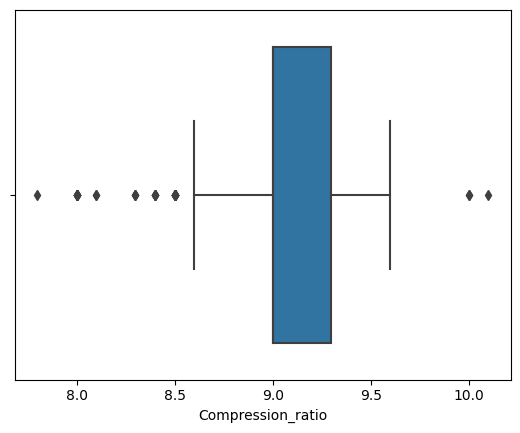

In [258]:
sns.boxplot(x=data.Compression_ratio)

### OUTLIERS FOR CITY_MPG

<Axes: xlabel='City_mpg', ylabel='Count'>

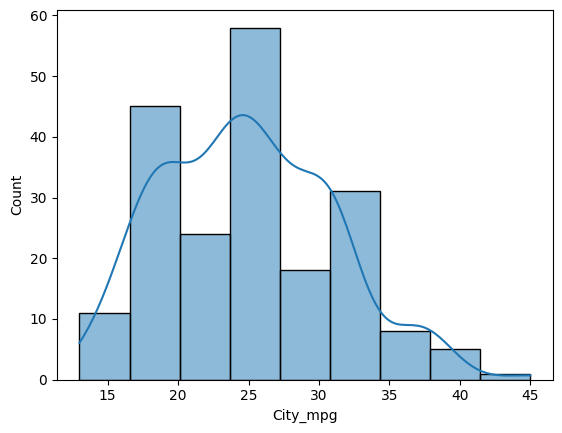

In [259]:
sns.histplot(data=data,x='City_mpg',kde=True)

In [260]:
Q1=data["City_mpg"].quantile(0.25)
print("lower_quartile",Q1)
Q3=data["City_mpg"].quantile(0.75)
print("upper_quartile",Q3)

lower_quartile 19.0
upper_quartile 30.0


In [261]:
IQR=Q3-Q1
IQR

11.0

In [262]:
lower_limit=Q1-1.5*IQR
print("lower_limit is",lower_limit)
upper_limit=Q3+1.5*IQR
print("upper_limit is",upper_limit)

lower_limit is 2.5
upper_limit is 46.5


In [263]:
data.loc[data["City_mpg"]>upper_limit]

,symboling,Normalized_loss,Make,Fuel_type,Aspiration,Doors,Body_style,Drive_wheels,Engine_location,Wheel_base,...,Engine_size,Fuel_system,Bore,Stroke,Compression_ratio,Horsepower,Peak_rpm,City_mpg,Highway_mpg,price


In [264]:
len(data.loc[data["City_mpg"]>upper_limit])/len(data)

0.0

In [265]:
data.loc[data["City_mpg"]>upper_limit,"City_mpg"]=data["City_mpg"].median()

<Axes: xlabel='City_mpg'>

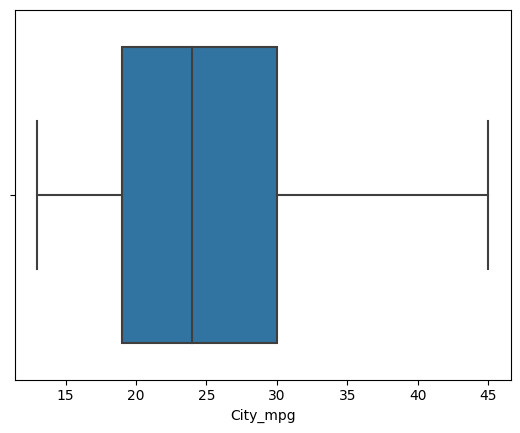

In [266]:
sns.boxplot(x=data.City_mpg)

### OUTLIERS FOR HIGHWAY_MPG

<Axes: xlabel='Highway_mpg', ylabel='Count'>

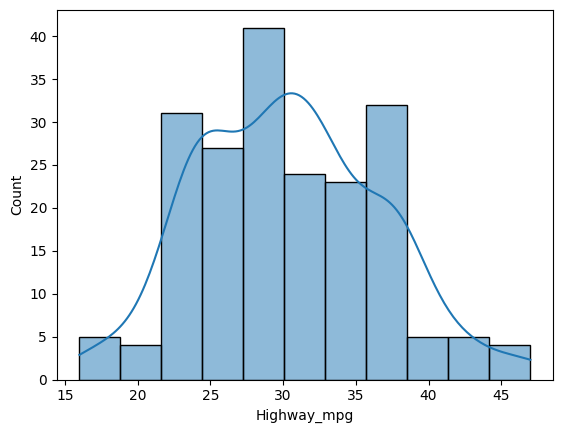

In [267]:
sns.histplot(data=data,x='Highway_mpg',kde=True)

In [268]:
Q1=data["Highway_mpg"].quantile(0.25)
print("lower_quartile",Q1)
Q3=data["Highway_mpg"].quantile(0.75)
print("upper_quartile",Q3)

lower_quartile 25.0
upper_quartile 34.0


In [269]:
IQR=Q3-Q1
IQR

9.0

In [270]:
lower_limit=Q1-1.5*IQR
print("lower_limit is",lower_limit)
upper_limit=Q3+1.5*IQR
print("upper_limit is",upper_limit)

lower_limit is 11.5
upper_limit is 47.5


In [271]:
data.loc[data["Highway_mpg"]>upper_limit]

,symboling,Normalized_loss,Make,Fuel_type,Aspiration,Doors,Body_style,Drive_wheels,Engine_location,Wheel_base,...,Engine_size,Fuel_system,Bore,Stroke,Compression_ratio,Horsepower,Peak_rpm,City_mpg,Highway_mpg,price


In [272]:
len(data.loc[data["Highway_mpg"]>upper_limit])/len(data)

0.0

In [273]:
data.loc[data["Highway_mpg"]>upper_limit,"Highway_mpg"]=data["Highway_mpg"].median()

<Axes: >

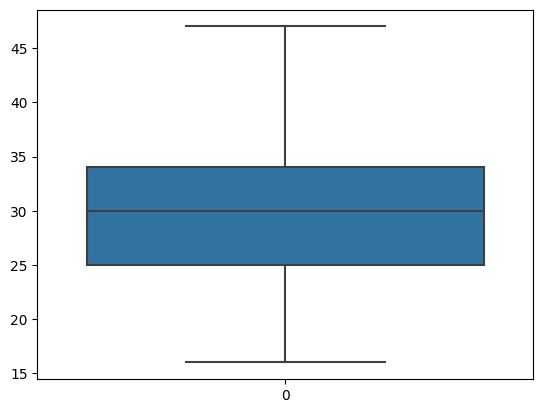

In [274]:
sns.boxplot(data.Highway_mpg)

### OUTLIERS FOR STROKE

<Axes: xlabel='Stroke', ylabel='Count'>

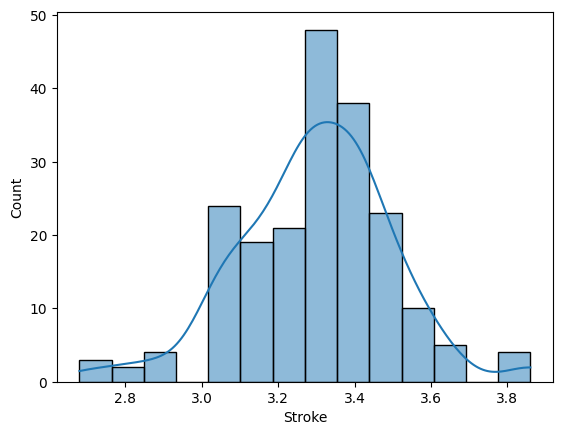

In [275]:
sns.histplot(data=data,x='Stroke',kde=True)

In [276]:
Q1=data["Stroke"].quantile(0.25)
print("lower_quartile",Q1)
Q3=data["Stroke"].quantile(0.75)
print("upper_quartile",Q3)

lower_quartile 3.15
upper_quartile 3.4


In [277]:
IQR=Q3-Q1
IQR

0.25

In [278]:
lower_limit=Q1-1.5*IQR
print("lower_limit is",lower_limit)
upper_limit=Q3+1.5*IQR
print("upper_limit is",upper_limit)

lower_limit is 2.775
upper_limit is 3.775


In [279]:
data.loc[data["Stroke"]>upper_limit]

,symboling,Normalized_loss,Make,Fuel_type,Aspiration,Doors,Body_style,Drive_wheels,Engine_location,Wheel_base,...,Engine_size,Fuel_system,Bore,Stroke,Compression_ratio,Horsepower,Peak_rpm,City_mpg,Highway_mpg,price
79,3,115.0,3,0,turbo,two,hatchback,fwd,front,95.9,...,156,spdi,3.58,3.86,9.0,145.0,5000.0,19,24,12629
80,3,115.0,3,0,turbo,two,hatchback,fwd,front,95.9,...,156,spdi,3.59,3.86,9.0,145.0,5000.0,19,24,14869
81,3,115.0,3,0,turbo,two,hatchback,fwd,front,95.9,...,156,spdi,3.59,3.86,9.0,145.0,5000.0,19,24,14489
121,3,115.0,12,0,turbo,two,hatchback,rwd,front,95.9,...,156,spdi,3.59,3.86,9.0,145.0,5000.0,19,24,12764


In [280]:
len(data.loc[data["Stroke"]>upper_limit])/len(data)

0.01990049751243781

In [281]:
data.loc[data["Stroke"]<lower_limit]

,symboling,Normalized_loss,Make,Fuel_type,Aspiration,Doors,Body_style,Drive_wheels,Engine_location,Wheel_base,...,Engine_size,Fuel_system,Bore,Stroke,Compression_ratio,Horsepower,Peak_rpm,City_mpg,Highway_mpg,price
0,3,115.0,18,0,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495
1,3,115.0,18,0,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500
46,0,115.0,16,0,std,two,sedan,rwd,front,102.0,...,120,mpfi,3.54,2.76,9.0,95.0,5000.0,13,17,36000


In [282]:
len(data.loc[data["Stroke"]<lower_limit])/len(data)

0.014925373134328358

In [283]:
data.loc[data["Stroke"]>upper_limit,"Stroke"]=data["Stroke"].median()

In [284]:
data.loc[data["Stroke"]<lower_limit,"Stroke"]=data["Stroke"].median()

<Axes: xlabel='Stroke'>

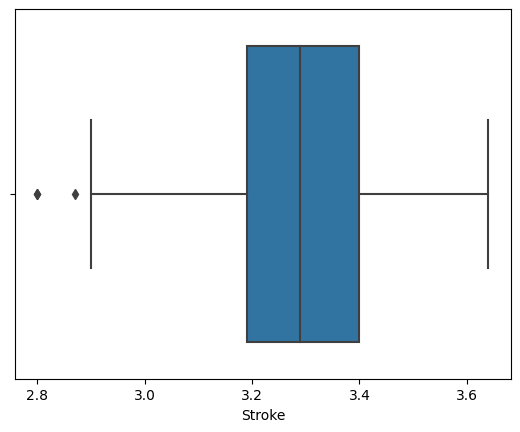

In [285]:
sns.boxplot(x=data.Stroke)

### OUTLIERS FOR HORSEPOWER

<Axes: xlabel='Horsepower', ylabel='Count'>

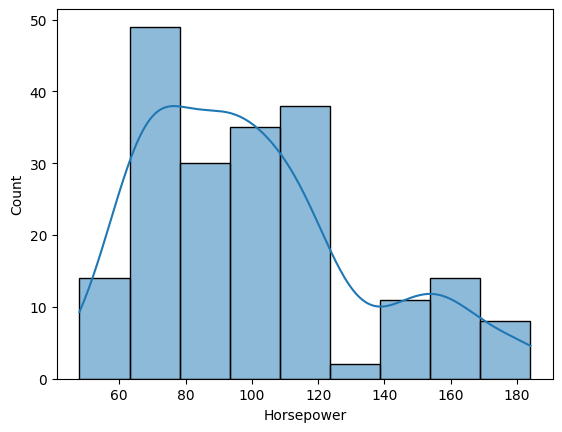

In [286]:
sns.histplot(data=data,x='Horsepower',kde=True)

In [287]:
Q1=data["Horsepower"].quantile(0.25)
print("lower_quartile",Q1)
Q3=data["Horsepower"].quantile(0.75)
print("upper_quartile",Q3)

lower_quartile 70.0
upper_quartile 116.0


In [288]:
IQR=Q3-Q1
IQR

46.0

In [289]:
lower_limit=Q1-1.5*IQR
print("lower_limit is",lower_limit)
upper_limit=Q3+1.5*IQR
print("upper_limit is",upper_limit)

lower_limit is 1.0
upper_limit is 185.0


In [290]:
data.loc[data["Horsepower"]>upper_limit]

,symboling,Normalized_loss,Make,Fuel_type,Aspiration,Doors,Body_style,Drive_wheels,Engine_location,Wheel_base,...,Engine_size,Fuel_system,Bore,Stroke,Compression_ratio,Horsepower,Peak_rpm,City_mpg,Highway_mpg,price


In [291]:
len(data.loc[data["Horsepower"]>upper_limit])/len(data)

0.0

In [292]:
data.loc[data["Horsepower"]<lower_limit]

,symboling,Normalized_loss,Make,Fuel_type,Aspiration,Doors,Body_style,Drive_wheels,Engine_location,Wheel_base,...,Engine_size,Fuel_system,Bore,Stroke,Compression_ratio,Horsepower,Peak_rpm,City_mpg,Highway_mpg,price


In [293]:
data.loc[data["Horsepower"]>upper_limit,"Horsepower"]=data["Horsepower"].median()

<Axes: xlabel='Horsepower'>

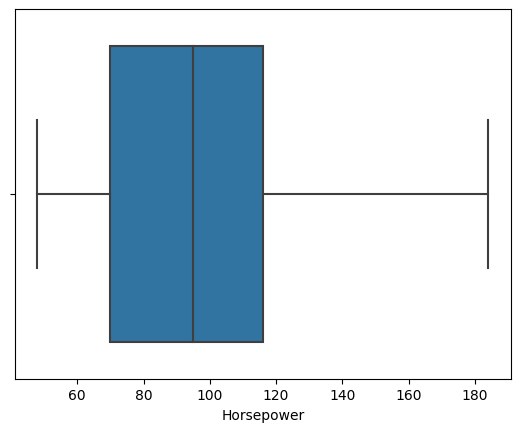

In [294]:
sns.boxplot(x=data.Horsepower)

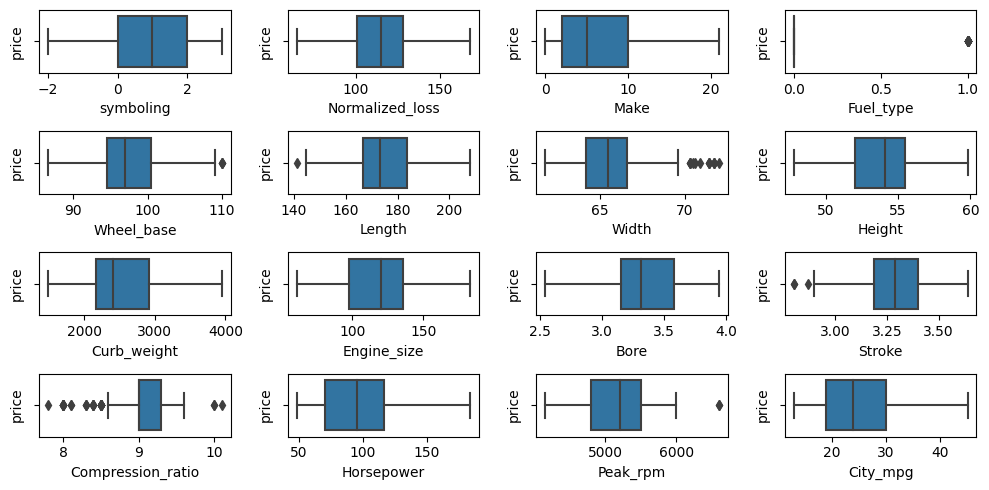

In [295]:
plt.figure(figsize=(10,5),facecolor="white")
plotnumber=1

for column in data1:
  if plotnumber<17:
    ax=plt.subplot(4,4,plotnumber)
    sns.boxplot(x=data[column])
    plt.xlabel(column,fontsize=10)
    plt.ylabel("price",fontsize=10)
  plotnumber+=1
plt.tight_layout()

# **Feature Engineering**

In [296]:
data2

Index(['make', 'fuel-type', 'aspiaration', 'num-of-doors', 'body-style',
       'drive-wheels', 'engine-location', 'engine-type', 'num-of-cyilnders',
       'fuel-system'],
      dtype='object')

## Coverting Categorical Column into Numerical Column

In [297]:
Make= {
    'toyota': 0,
    'nissan': 1,
    'mazda': 2,
    'mitsubishi': 3,
    'honda': 4,
    'volkswagen': 5,
    'subaru': 6,
    'peugot': 7,
    'volvo': 8,
    'dodge': 9,
    'mercedes-benz': 10,
    'bmw': 11,
    'plymouth': 12,
    'audi': 13,
    'saab': 14,
    'porsche': 15,
    'jaguar': 16,
    'chevrolet': 17,
    'alfa-romero': 18,
    'isuzu': 19,
    'renault': 19,  # Assign the same label as 'isuzu'
    'mercury': 21
}

# Apply Manual encoding to 'make' column
data['Make'] = data['Make'].map(Make)

In [298]:
data.head(2)

,symboling,Normalized_loss,Make,Fuel_type,Aspiration,Doors,Body_style,Drive_wheels,Engine_location,Wheel_base,...,Engine_size,Fuel_system,Bore,Stroke,Compression_ratio,Horsepower,Peak_rpm,City_mpg,Highway_mpg,price
0,3,115.0,NaN,0,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,3.29,9.0,111.0,5000.0,21,27,13495
1,3,115.0,NaN,0,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,3.29,9.0,111.0,5000.0,21,27,16500


In [299]:
#fuel_type
data.Fuel_type.unique()
data.Fuel_type.value_counts()

0    181
1     20
Name: Fuel_type, dtype: int64

In [300]:
Fuel_type= {
    'gas': 0,
    'diesel': 1
}

# Apply manual encoding to 'fuel-type' column
data['Fuel_type'] = data['Fuel_type'].map(Fuel_type)


In [301]:
data.head(2)

,symboling,Normalized_loss,Make,Fuel_type,Aspiration,Doors,Body_style,Drive_wheels,Engine_location,Wheel_base,...,Engine_size,Fuel_system,Bore,Stroke,Compression_ratio,Horsepower,Peak_rpm,City_mpg,Highway_mpg,price
0,3,115.0,NaN,NaN,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,3.29,9.0,111.0,5000.0,21,27,13495
1,3,115.0,NaN,NaN,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,3.29,9.0,111.0,5000.0,21,27,16500


In [302]:
#Aspiration
data.Aspiration.unique()
data.Aspiration.value_counts()

std      165
turbo     36
Name: Aspiration, dtype: int64

In [303]:
Aspiration = {
    'std': 0,
    'turbo': 1
}

# Apply manual encoding to 'aspiration' column
data['Aspiration'] = data['Aspiration'].map(Aspiration)

In [304]:
data.tail(3)

,symboling,Normalized_loss,Make,Fuel_type,Aspiration,Doors,Body_style,Drive_wheels,Engine_location,Wheel_base,...,Engine_size,Fuel_system,Bore,Stroke,Compression_ratio,Horsepower,Peak_rpm,City_mpg,Highway_mpg,price
198,-1,95.0,NaN,NaN,0,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134.0,5500.0,18,23,21485
199,-1,95.0,NaN,NaN,1,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,9.0,106.0,4800.0,26,27,22470
200,-1,95.0,NaN,NaN,1,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114.0,5400.0,19,25,22625


In [305]:
#Doors
data.Doors.unique()
data.Doors.value_counts()

four    115
two      86
Name: Doors, dtype: int64

In [306]:
Doors = {
    'four': 0,
    'two': 1
}

# Fill missing values with a default value (e.g., 'four')


# Apply manual encoding to 'num-of-doors' column
data['Doors'] = data['Doors'].map(Doors)
data.head(3)

,symboling,Normalized_loss,Make,Fuel_type,Aspiration,Doors,Body_style,Drive_wheels,Engine_location,Wheel_base,...,Engine_size,Fuel_system,Bore,Stroke,Compression_ratio,Horsepower,Peak_rpm,City_mpg,Highway_mpg,price
0,3,115.0,NaN,NaN,0,1,convertible,rwd,front,88.6,...,130,mpfi,3.47,3.29,9.0,111.0,5000.0,21,27,13495
1,3,115.0,NaN,NaN,0,1,convertible,rwd,front,88.6,...,130,mpfi,3.47,3.29,9.0,111.0,5000.0,21,27,16500
2,1,115.0,NaN,NaN,0,1,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500


In [307]:
#body_style
data.Body_style.unique()
data.Body_style.value_counts()

sedan          94
hatchback      68
wagon          25
hardtop         8
convertible     6
Name: Body_style, dtype: int64

In [308]:
Body_style = {
    'sedan': 0,
    'hatchback': 1,
    'wagon': 2,
    'hardtop': 3,
    'convertible': 4
}

# Apply manual encoding to 'body-style' column
data['Body_style'] = data['Body_style'].map(Body_style)
data.head(2)

,symboling,Normalized_loss,Make,Fuel_type,Aspiration,Doors,Body_style,Drive_wheels,Engine_location,Wheel_base,...,Engine_size,Fuel_system,Bore,Stroke,Compression_ratio,Horsepower,Peak_rpm,City_mpg,Highway_mpg,price
0,3,115.0,NaN,NaN,0,1,4,rwd,front,88.6,...,130,mpfi,3.47,3.29,9.0,111.0,5000.0,21,27,13495
1,3,115.0,NaN,NaN,0,1,4,rwd,front,88.6,...,130,mpfi,3.47,3.29,9.0,111.0,5000.0,21,27,16500


In [309]:
##drive_wheels
data.Drive_wheels.unique()
data.Drive_wheels.value_counts()

fwd    118
rwd     75
4wd      8
Name: Drive_wheels, dtype: int64

In [310]:
Drive_wheels= {
    'fwd': 0,
    'rwd': 1,
    '4wd': 2
}

# Apply manual encoding to 'drive-wheels' column
data['Drive_wheels'] = data['Drive_wheels'].map(Drive_wheels)
data.head()

,symboling,Normalized_loss,Make,Fuel_type,Aspiration,Doors,Body_style,Drive_wheels,Engine_location,Wheel_base,...,Engine_size,Fuel_system,Bore,Stroke,Compression_ratio,Horsepower,Peak_rpm,City_mpg,Highway_mpg,price
0,3,115.0,NaN,NaN,0,1,4,1,front,88.6,...,130,mpfi,3.47,3.29,9.0,111.0,5000.0,21,27,13495
1,3,115.0,NaN,NaN,0,1,4,1,front,88.6,...,130,mpfi,3.47,3.29,9.0,111.0,5000.0,21,27,16500
2,1,115.0,NaN,NaN,0,1,1,1,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500
3,2,164.0,NaN,NaN,0,0,0,0,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950
4,2,164.0,NaN,NaN,0,0,0,2,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450


In [311]:
##engine_location
data.Engine_location.unique()
data.Engine_location.value_counts()

front    198
rear       3
Name: Engine_location, dtype: int64

In [312]:
Engine_location = {
    'front': 0,
    'rear': 1
}

# Apply manual encoding to 'engine-location' column
data['Engine_location'] = data['Engine_location'].map(Engine_location)
data.head(2)

,symboling,Normalized_loss,Make,Fuel_type,Aspiration,Doors,Body_style,Drive_wheels,Engine_location,Wheel_base,...,Engine_size,Fuel_system,Bore,Stroke,Compression_ratio,Horsepower,Peak_rpm,City_mpg,Highway_mpg,price
0,3,115.0,NaN,NaN,0,1,4,1,0,88.6,...,130,mpfi,3.47,3.29,9.0,111.0,5000.0,21,27,13495
1,3,115.0,NaN,NaN,0,1,4,1,0,88.6,...,130,mpfi,3.47,3.29,9.0,111.0,5000.0,21,27,16500


In [313]:
#fuel_system
data.Fuel_system.unique()
data.Fuel_system.value_counts()

mpfi    92
2bbl    64
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: Fuel_system, dtype: int64

In [314]:
Fuel_system= {
    'mpfi': 0,
    '2bbl': 1,
    'idi': 2,
    '1bbl': 3,
    'spdi': 4,
    '4bbl': 5,
    'mfi': 6,
    'spfi': 7
}

# Apply manual encoding to 'fuel-system' column
data['Fuel_system'] = data['Fuel_system'].map(Fuel_system)
data.head(2)

,symboling,Normalized_loss,Make,Fuel_type,Aspiration,Doors,Body_style,Drive_wheels,Engine_location,Wheel_base,...,Engine_size,Fuel_system,Bore,Stroke,Compression_ratio,Horsepower,Peak_rpm,City_mpg,Highway_mpg,price
0,3,115.0,NaN,NaN,0,1,4,1,0,88.6,...,130,0,3.47,3.29,9.0,111.0,5000.0,21,27,13495
1,3,115.0,NaN,NaN,0,1,4,1,0,88.6,...,130,0,3.47,3.29,9.0,111.0,5000.0,21,27,16500


In [316]:
# Cylinders
data.Cylinders.unique()
data.Cylinders.value_counts()

four      157
six        24
five       10
two         4
eight       4
three       1
twelve      1
Name: Cylinders, dtype: int64

In [318]:
data.Cylinders=data.Cylinders.map({"twelve":0,
                                   "three":1,
                                   "eight":2,
                                   "two":3,
                                   "five":4,
                                   "six":5,
                                   "four":6})

In [319]:
data.head()

,symboling,Normalized_loss,Make,Fuel_type,Aspiration,Doors,Body_style,Drive_wheels,Engine_location,Wheel_base,...,Engine_size,Fuel_system,Bore,Stroke,Compression_ratio,Horsepower,Peak_rpm,City_mpg,Highway_mpg,price
0,3,115.0,NaN,NaN,0,1,4,1,0,88.6,...,130,0,3.47,3.29,9.0,111.0,5000.0,21,27,13495
1,3,115.0,NaN,NaN,0,1,4,1,0,88.6,...,130,0,3.47,3.29,9.0,111.0,5000.0,21,27,16500
2,1,115.0,NaN,NaN,0,1,1,1,0,94.5,...,152,0,2.68,3.47,9.0,154.0,5000.0,19,26,16500
3,2,164.0,NaN,NaN,0,0,0,0,0,99.8,...,109,0,3.19,3.40,10.0,102.0,5500.0,24,30,13950
4,2,164.0,NaN,NaN,0,0,0,2,0,99.4,...,136,0,3.19,3.40,8.0,115.0,5500.0,18,22,17450
